In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid' , palette='tab10')

In [3]:
data = pd.read_csv('全广州所有餐厅数据_未清洗数据65318条.csv',encoding='utf-8-sig')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65318 entries, 0 to 65317
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     65318 non-null  int64 
 1   parent         65318 non-null  object
 2   distance       65318 non-null  object
 3   pcode          65318 non-null  int64 
 4   importance     65318 non-null  object
 5   biz_ext        65318 non-null  object
 6   recommend      65318 non-null  int64 
 7   type           65318 non-null  object
 8   photos         65318 non-null  object
 9   discount_num   65318 non-null  int64 
 10  gridcode       65318 non-null  int64 
 11  typecode       65318 non-null  object
 12  shopinfo       65318 non-null  int64 
 13  poiweight      65318 non-null  object
 14  citycode       65318 non-null  int64 
 15  adname         65318 non-null  object
 16  children       65318 non-null  object
 17  alias          65318 non-null  object
 18  tel            65318 non-n

In [4]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
data.head()

,parent,distance,pcode,importance,biz_ext,recommend,type,photos,discount_num,gridcode,...,match,business_area,indoor_data,childtype,exit_location,name,location,shopid,navi_poiid,groupbuy_num
0,[],[],440000,[],"{'cost': '41.00', 'rating': '4.5', 'meal_order...",0,餐饮服务;中餐厅;中餐厅,"[{'title': [], 'url': 'http://store.is.autonav...",0,3413510810,...,0,[],"{'cmsid': [], 'truefloor': [], 'cpid': [], 'fl...",[],[],3度MC酒吧,"113.227493,23.088644",[],F49F011042_373798,0
1,[],[],440000,[],"{'cost': '211.00', 'rating': '5.0', 'meal_orde...",0,餐饮服务;中餐厅;中式素菜馆,"[{'title': [], 'url': 'http://store.is.autonav...",0,3413513802,...,0,[],"{'cmsid': [], 'truefloor': [], 'cpid': [], 'fl...",[],[],素会,"113.235395,23.108614",[],F49F011042_833991,0
2,[],[],440000,[],"{'cost': '40.00', 'rating': '4.6', 'meal_order...",0,餐饮服务;中餐厅;中餐厅,"[{'title': [], 'url': 'http://store.is.autonav...",0,3413510920,...,0,[],"{'cmsid': [], 'truefloor': [], 'cpid': [], 'fl...",[],[],德生楼私房菜,"113.237935,23.090081",[],[],0
3,[],[],440000,[],"{'cost': '82.00', 'rating': '4.5', 'meal_order...",0,餐饮服务;中餐厅;火锅店,"[{'title': [], 'url': 'http://store.is.autonav...",0,3413426022,...,0,[],"{'cmsid': [], 'truefloor': [], 'cpid': [], 'fl...",[],[],华哥新鲜猪精品美食,"113.260515,23.056780",[],F49F012043_301538,0
4,B00140UFE8,[],440000,[],"{'cost': '221.00', 'rating': '5.0', 'meal_orde...",0,餐饮服务;中餐厅;广东菜(粤菜),"[{'title': [], 'url': 'http://store.is.autonav...",0,3413512921,...,0,[],"{'cmsid': [], 'truefloor': [], 'cpid': [], 'fl...",202,[],宏图府餐厅,"113.242590,23.105824",[],F49F011042_129458;732764,0


In [5]:
# 查看多少重复

data[data.duplicated()].shape

(16698, 42)

In [6]:
#去重
data_unique = data.drop_duplicates()
data_unique.shape

(48620, 42)

In [7]:
# biz z字段转成dict

def changeDict(s):
    return eval(s)

data_unique['biz_ext'] = data_unique['biz_ext'].apply(changeDict)

In [8]:
#获取人均消费和评分

def getCost(biz):
    if biz['cost'] == []:
        return 0
    else:
        return float(biz['cost'])
    
def getRating(biz):
    if biz['rating'] == []:
        return 0
    else:
        return float(biz['rating'])
    
print(getCost(data_unique.iloc[4]['biz_ext']))
print(getRating(data_unique.iloc[4]['biz_ext']))

221.0
5.0


In [9]:
data_unique['cost'] = data_unique['biz_ext'].apply(getCost)

In [10]:
data_unique['rating'] = data_unique['biz_ext'].apply(getRating)

In [11]:
data_unique[['cost','rating']].describe()

,cost,rating
count,48620.000000,48620.000000
mean,20.367071,2.451070
std,41.365539,1.725398
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.500000
75%,26.000000,3.500000
max,1652.000000,5.000000


[Text(0.5, 0, 'cost'), Text(0.5, 1.0, '观察人均消费密度分布')]

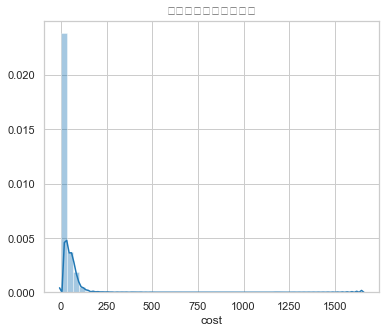

In [12]:
#观察人均消费密度分布
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(6,5)

sns.distplot(data_unique['cost'])

ax.set(xlabel='cost',title='观察人均消费密度分布',)

In [13]:
# 人均消费为0的太多，人均消费44.16元
data_unique[data_unique['cost']!=0].mean()

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.422812e+09
shopinfo        9.328874e-02
citycode        2.000000e+01
indoor_map      6.251951e-02
adcode          4.401091e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            4.415817e+01
rating          3.588954e+00
dtype: float64

In [14]:
# 人均评分3.59
data_unique[data_unique['rating']!=0].mean()

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.425313e+09
shopinfo        8.713618e-02
citycode        2.000000e+01
indoor_map      4.457849e-02
adcode          4.401096e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            2.930421e+01
rating          3.594360e+00
dtype: float64

In [15]:
# 按照区来分餐厅

data_unique.groupby(by=['adname']).count()['parent']

adname
从化区    2075
南沙区    2628
增城区    3762
天河区    7004
海珠区    4730
番禺区    6305
白云区    7285
花都区    4076
荔湾区    3462
越秀区    3957
黄埔区    3336
Name: parent, dtype: int64

In [65]:
# 按照区来分餐厅人均消费

data_unique[data_unique['cost']!=0].groupby(by='adname').mean()[['cost','rating']]

,cost,rating
adname,,
从化区,40.861401,3.496125
南沙区,39.436341,3.435105
增城区,37.706780,3.423814
天河区,55.400093,3.704425
海珠区,44.940566,3.671393
番禺区,41.289456,3.573439
白云区,40.319913,3.502612
花都区,39.717723,3.376022
荔湾区,37.874700,3.588789


In [16]:
data_unique.to_csv('for wps 可视化.csv',encoding='utf-8-sig')

In [18]:
# 区分中餐厅、外国餐厅、快餐厅、咖啡厅、茶饮休闲
# 先清洗当中的分类字眼


print(data_unique[data_unique['type'].str.contains('中餐厅')].shape[0])
print(data_unique[data_unique['type'].str.contains('外国餐厅')].shape[0])
print(data_unique[data_unique['type'].str.contains('快餐厅')].shape[0])
print(data_unique[data_unique['type'].str.contains('咖啡厅')].shape[0])
print(data_unique[data_unique['type'].str.contains('茶艺馆|冷饮店|蛋糕店|甜品店|休闲餐厅')].shape[0])

22254
3459
9565
1904
7314


In [21]:
data_zhongcai = data_unique[data_unique['type'].str.contains('中餐厅')]
data_zhongcai[data_zhongcai['cost']!=0].mean()

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.422988e+09
shopinfo        9.058865e-02
citycode        2.000000e+01
indoor_map      4.502996e-02
adcode          4.401093e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            4.968638e+01
rating          3.569228e+00
dtype: float64

In [23]:
data_waiguo = data_unique[data_unique['type'].str.contains('外国餐厅')]
data_waiguo[data_waiguo['cost']!=0].mean()                      

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.421873e+09
shopinfo        7.308642e-02
citycode        2.000000e+01
indoor_map      1.061728e-01
adcode          4.401086e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            8.505975e+01
rating          3.718074e+00
dtype: float64

In [24]:
data_kuaicai = data_unique[data_unique['type'].str.contains('快餐厅')]
data_kuaicai[data_kuaicai['cost']!=0].mean()

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.423217e+09
shopinfo        5.366452e-02
citycode        2.000000e+01
indoor_map      7.114382e-02
adcode          4.401089e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            2.778442e+01
rating          3.570960e+00
dtype: float64

In [25]:
data_coffee = data_unique[data_unique['type'].str.contains('咖啡厅')]
data_coffee[data_coffee['cost']!=0].mean()

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.418974e+09
shopinfo        2.206439e-01
citycode        2.000000e+01
indoor_map      8.617424e-02
adcode          4.401075e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            4.106818e+01
rating          3.697159e+00
dtype: float64

In [26]:
data_other = data_unique[data_unique['type'].str.contains('茶艺馆|冷饮店|蛋糕店|甜品店|休闲餐厅')]
data_other[data_other['cost']!=0].mean()

pcode           4.400000e+05
recommend       0.000000e+00
discount_num    0.000000e+00
gridcode        3.421243e+09
shopinfo        1.295045e-01
citycode        2.000000e+01
indoor_map      9.722222e-02
adcode          4.401090e+05
match           0.000000e+00
groupbuy_num    0.000000e+00
cost            2.251839e+01
rating          3.580405e+00
dtype: float64

In [36]:
data_unique.groupby(by=['adname','type']).count()['parent']

adname  type                         
从化区     住宿服务;宾馆酒店;宾馆酒店|餐饮服务;中餐厅;中餐厅        1
        体育休闲服务;休闲场所;休闲场所|餐饮服务;中餐厅;中餐厅      1
        公司企业;公司;公司|餐饮服务;冷饮店;冷饮店            1
        科教文化服务;培训机构;培训机构|餐饮服务;中餐厅;中餐厅      1
        餐饮服务;中餐厅;东北菜                       2
                                        ... 
黄埔区     餐饮服务;甜品店;甜品店|餐饮服务;糕饼店;糕饼店          1
        餐饮服务;糕饼店;糕饼店                     162
        餐饮服务;糕饼店;糕饼店|餐饮服务;咖啡厅;咖啡厅          1
        餐饮服务;茶艺馆;茶艺馆                      35
        餐饮服务;餐饮相关场所;餐饮相关                  44
Name: parent, Length: 1109, dtype: int64

In [59]:
category_rank = data_unique.groupby(by='adname').count().sort_values(by='name',ascending=False)
category_rank

,parent,distance,pcode,importance,biz_ext,recommend,type,photos,discount_num,gridcode,...,indoor_data,childtype,exit_location,name,location,shopid,navi_poiid,groupbuy_num,cost,rating
adname,,,,,,,,,,,,,,,,,,,,,
白云区,7285,7285,7285,7285,7285,7285,7285,7285,7285,7285,...,7285,7285,7285,7285,7285,7285,7285,7285,7285,7285
天河区,7004,7004,7004,7004,7004,7004,7004,7004,7004,7004,...,7004,7004,7004,7004,7004,7004,7004,7004,7004,7004
番禺区,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305,...,6305,6305,6305,6305,6305,6305,6305,6305,6305,6305
海珠区,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730,...,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730
花都区,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076,...,4076,4076,4076,4076,4076,4076,4076,4076,4076,4076
越秀区,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,...,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957
增城区,3762,3762,3762,3762,3762,3762,3762,3762,3762,3762,...,3762,3762,3762,3762,3762,3762,3762,3762,3762,3762
荔湾区,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,...,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462
黄埔区,3336,3336,3336,3336,3336,3336,3336,3336,3336,3336,...,3336,3336,3336,3336,3336,3336,3336,3336,3336,3336


In [86]:
#清洗type字段中的字眼

name_list = ['餐饮服务;中餐厅;','餐饮服务;外国餐厅;','餐饮服务;快餐厅;','餐饮服务;咖啡厅;','餐饮服务;糕饼店;','餐饮服务;甜品店;',
             '体育休闲服务;休闲场所;休闲场所','餐饮服务;休闲餐饮场所;','科教文化服务;培训机构;培训机构','餐饮服务;冷饮店;','餐饮服务;茶艺馆;',
             '餐饮服务;','餐饮服务;餐饮相关场所;','购物服务;服装鞋帽皮具店;服装鞋帽皮具店','公司企业;公司;公司','购物服务;专卖店;烟酒专卖店',
             '体育休闲服务;娱乐场所;KTV','购物服务;专卖店;专营店',';']
def getNewTypeName(type_name):
    for i in range(len(name_list)):
        if name_list[i] in type_name:
            type_name = type_name.replace(name_list[i],'')
    return type_name
    
getNewTypeName('购物服务;服装鞋帽皮具店;服装鞋帽皮具店|餐饮服务;咖啡厅;咖啡厅')

',咖啡厅'

In [83]:
data_unique['newType'] = data_unique['type'].apply(getNewTypeName)

In [84]:
data_unique['newType'] 

0            中餐厅
1          中式素菜馆
2            中餐厅
3            火锅店
4        广东菜(粤菜)
          ...   
65313        甜品店
65314        甜品店
65315        甜品店
65316        甜品店
65317        甜品店
Name: newType, Length: 48620, dtype: object

In [85]:
#做一个所有分类的树形图

final_list = []
cate_list = data_unique.groupby(by='adname').count()

#第一层
for i in range(len(cate_list)):
    cateName = cate_list.index[i] #区名
    
    #第二层
    sub_list = data_unique[data_unique.adname==cateName].groupby(by='newType').count()
    two_list = []
    for j in range(len(sub_list)):
        temp_dict = {'value':sub_list.iloc[j]['name'], 'name':sub_list.index[j]}
        two_list.append(temp_dict)
        
    temp_dict = {'value':category_rank.iloc[i]['name'], 'name':category_rank.index[i], 'children':two_list}
    print(temp_dict)
    final_list.append(temp_dict)

{'value': 7285, 'name': '白云区', 'children': [{'value': 2, 'name': '东北菜'}, {'value': 4, 'name': '中式素菜馆'}, {'value': 684, 'name': '中餐厅'}, {'value': 2, 'name': '中餐厅休闲餐饮场所'}, {'value': 1, 'name': '中餐厅住宿服务宾馆酒店宾馆酒店'}, {'value': 2, 'name': '中餐厅体育休闲服务体育休闲服务场所体育休闲服务场所'}, {'value': 1, 'name': '中餐厅生活服务洗浴推拿场所洗浴推拿场所'}, {'value': 1, 'name': '云贵菜'}, {'value': 6, 'name': '休闲餐饮场所'}, {'value': 2, 'name': '休闲餐饮场所中餐厅'}, {'value': 1, 'name': '休闲餐饮场所冷饮店'}, {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店中餐厅'}, {'value': 1, 'name': '其它亚洲菜咖啡厅'}, {'value': 122, 'name': '冷饮店'}, {'value': 2, 'name': '台湾菜'}, {'value': 24, 'name': '咖啡厅'}, {'value': 1, 'name': '咖啡厅中餐厅'}, {'value': 20, 'name': '四川菜(川菜)'}, {'value': 1, 'name': '四川菜(川菜)潮州菜'}, {'value': 1, 'name': '四川菜(川菜)特色/地方风味餐厅'}, {'value': 28, 'name': '外国餐厅'}, {'value': 62, 'name': '广东菜(粤菜)'}, {'value': 1, 'name': '必胜客'}, {'value': 495, 'name': '快餐厅'}, {'value': 3, 'name': '意式菜品餐厅'}, {'value': 23, 'name': '日本料理'}, {'value': 3, 'name': '浙江菜'}, {'value': 20, 'name': '海鲜酒楼'}, {'val

{'value': 3957, 'name': '越秀区', 'children': [{'value': 1, 'name': 'Pacific Coffee Company'}, {'value': 19, 'name': '东北菜'}, {'value': 1, 'name': '东北菜特色/地方风味餐厅'}, {'value': 19, 'name': '中式素菜馆'}, {'value': 551, 'name': '中餐厅'}, {'value': 5, 'name': '中餐厅休闲餐饮场所'}, {'value': 1, 'name': '中餐厅休闲餐饮场所冷饮店'}, {'value': 1, 'name': '中餐厅冷饮店'}, {'value': 1, 'name': '中餐厅商务住宅商务住宅相关商务住宅相关'}, {'value': 5, 'name': '中餐厅甜品店'}, {'value': 4, 'name': '中餐厅糕饼店'}, {'value': 1, 'name': '中餐厅茶艺馆'}, {'value': 5, 'name': '云贵菜'}, {'value': 28, 'name': '休闲餐饮场所'}, {'value': 1, 'name': '休闲餐饮场所咖啡厅'}, {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店餐饮相关场所餐饮相关'}, {'value': 2, 'name': '体育休闲服务娱乐场所酒吧中餐厅'}, {'value': 1, 'name': '体育休闲服务娱乐场所酒吧中餐厅休闲餐饮场所'}, {'value': 1, 'name': '体育休闲服务娱乐场所酒吧休闲餐饮场所'}, {'value': 1, 'name': '体育休闲服务娱乐场所酒吧糕饼店'}, {'value': 3, 'name': '其它亚洲菜'}, {'value': 1, 'name': '其它亚洲菜泰国/越南菜品餐厅'}, {'value': 834, 'name': '冷饮店'}, {'value': 3, 'name': '冷饮店中餐厅'}, {'value': 1, 'name': '冷饮店咖啡厅'}, {'value': 3, 'name': '冷饮店甜品店'}, {'value': 1, 'n

{'value': 2628, 'name': '南沙区', 'children': [{'value': 9, 'name': 'Pacific Coffee Company'}, {'value': 2, 'name': '上海菜'}, {'value': 5, 'name': '东北菜'}, {'value': 10, 'name': '中式素菜馆'}, {'value': 543, 'name': '中餐厅'}, {'value': 2, 'name': '中餐厅休闲餐饮场所'}, {'value': 1, 'name': '中餐厅冷饮店'}, {'value': 1, 'name': '中餐厅甜品店冷饮店'}, {'value': 7, 'name': '云贵菜'}, {'value': 1, 'name': '云贵菜特色/地方风味餐厅'}, {'value': 1, 'name': '仙跡岩'}, {'value': 10, 'name': '休闲餐饮场所'}, {'value': 1, 'name': '休闲餐饮场所冷饮店'}, {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店中餐厅'}, {'value': 1, 'name': '体育休闲服务娱乐场所酒吧咖啡厅'}, {'value': 1, 'name': '体育休闲服务娱乐场所酒吧西餐厅(综合风味)糕饼店'}, {'value': 1, 'name': '体育休闲服务娱乐场所酒吧餐饮相关场所餐饮相关'}, {'value': 2, 'name': '其它亚洲菜'}, {'value': 316, 'name': '冷饮店'}, {'value': 1, 'name': '冷饮店中餐厅'}, {'value': 1, 'name': '冷饮店中餐厅糕饼店'}, {'value': 1, 'name': '冷饮店休闲餐饮场所'}, {'value': 4, 'name': '冷饮店甜品店'}, {'value': 4, 'name': '冷饮店购物服务购物相关场所购物相关场所'}, {'value': 3, 'name': '印度风味'}, {'value': 1, 'name': '印度风味其它亚洲菜'}, {'value': 1, 'name': '印度风味西餐厅(综合风味)

In [87]:
final_list

[{'value': 7285,
  'name': '白云区',
  'children': [{'value': 2, 'name': '东北菜'},
   {'value': 4, 'name': '中式素菜馆'},
   {'value': 684, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅住宿服务宾馆酒店宾馆酒店'},
   {'value': 2, 'name': '中餐厅体育休闲服务体育休闲服务场所体育休闲服务场所'},
   {'value': 1, 'name': '中餐厅生活服务洗浴推拿场所洗浴推拿场所'},
   {'value': 1, 'name': '云贵菜'},
   {'value': 6, 'name': '休闲餐饮场所'},
   {'value': 2, 'name': '休闲餐饮场所中餐厅'},
   {'value': 1, 'name': '休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店中餐厅'},
   {'value': 1, 'name': '其它亚洲菜咖啡厅'},
   {'value': 122, 'name': '冷饮店'},
   {'value': 2, 'name': '台湾菜'},
   {'value': 24, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅中餐厅'},
   {'value': 20, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)潮州菜'},
   {'value': 1, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 28, 'name': '外国餐厅'},
   {'value': 62, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '必胜客'},
   {'value': 495, 'name': '快餐厅'},
   {'value': 3, 'name': '意式菜品餐厅'},
   {'value': 23, 'n

In [89]:
data = [{'value': 7285,
  'name': '白云区',
  'children': [{'value': 2, 'name': '东北菜'},
   {'value': 4, 'name': '中式素菜馆'},
   {'value': 684, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅住宿服务宾馆酒店宾馆酒店'},
   {'value': 2, 'name': '中餐厅体育休闲服务体育休闲服务场所体育休闲服务场所'},
   {'value': 1, 'name': '中餐厅生活服务洗浴推拿场所洗浴推拿场所'},
   {'value': 1, 'name': '云贵菜'},
   {'value': 6, 'name': '休闲餐饮场所'},
   {'value': 2, 'name': '休闲餐饮场所中餐厅'},
   {'value': 1, 'name': '休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店中餐厅'},
   {'value': 1, 'name': '其它亚洲菜咖啡厅'},
   {'value': 122, 'name': '冷饮店'},
   {'value': 2, 'name': '台湾菜'},
   {'value': 24, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅中餐厅'},
   {'value': 20, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)潮州菜'},
   {'value': 1, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 28, 'name': '外国餐厅'},
   {'value': 62, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '必胜客'},
   {'value': 495, 'name': '快餐厅'},
   {'value': 3, 'name': '意式菜品餐厅'},
   {'value': 23, 'name': '日本料理'},
   {'value': 3, 'name': '浙江菜'},
   {'value': 20, 'name': '海鲜酒楼'},
   {'value': 11, 'name': '清真菜馆'},
   {'value': 16, 'name': '湖南菜(湘菜)'},
   {'value': 7, 'name': '潮州菜'},
   {'value': 45, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店茶艺馆'},
   {'value': 1, 'name': '牛扒店(扒房)'},
   {'value': 95, 'name': '特色/地方风味餐厅'},
   {'value': 36, 'name': '甜品店'},
   {'value': 106, 'name': '糕饼店'},
   {'value': 2, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 25, 'name': '综合酒楼'},
   {'value': 4, 'name': '肯德基'},
   {'value': 18, 'name': '茶艺馆'},
   {'value': 10, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅茶艺馆'},
   {'value': 21, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)牛扒店(扒房)'},
   {'value': 6, 'name': '韩国料理'},
   {'value': 152, 'name': '餐饮相关场所餐饮相关'},
   {'value': 3, 'name': '麦当劳'}]},
 {'value': 7004,
  'name': '天河区',
  'children': [{'value': 4, 'name': '东北菜'},
   {'value': 2, 'name': '中式素菜馆'},
   {'value': 608, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅冷饮店'},
   {'value': 5, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所中餐厅'},
   {'value': 1, 'name': '休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '体育休闲服务休闲场所垂钓园中餐厅'},
   {'value': 245, 'name': '冷饮店'},
   {'value': 1, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '台湾菜'},
   {'value': 47, 'name': '咖啡厅'},
   {'value': 59, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)海鲜酒楼'},
   {'value': 32, 'name': '外国餐厅'},
   {'value': 1, 'name': '安徽菜(徽菜)'},
   {'value': 42, 'name': '广东菜(粤菜)'},
   {'value': 2, 'name': '必胜客'},
   {'value': 713, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅休闲餐饮场所'},
   {'value': 1, 'name': '快餐厅咖啡厅'},
   {'value': 1, 'name': '意式菜品餐厅'},
   {'value': 17, 'name': '日本料理'},
   {'value': 2, 'name': '星巴克咖啡'},
   {'value': 1, 'name': '泰国/越南菜品餐厅'},
   {'value': 1, 'name': '浙江菜'},
   {'value': 35, 'name': '海鲜酒楼'},
   {'value': 36, 'name': '清真菜馆'},
   {'value': 73, 'name': '湖南菜(湘菜)'},
   {'value': 26, 'name': '潮州菜'},
   {'value': 53, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店四川菜(川菜)'},
   {'value': 1, 'name': '火锅店汽车服务汽车服务相关汽车服务相关'},
   {'value': 1, 'name': '牛扒店(扒房)'},
   {'value': 176, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅四川菜(川菜)'},
   {'value': 36, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店中餐厅'},
   {'value': 1, 'name': '生活服务中介机构中介机构中餐厅'},
   {'value': 140, 'name': '糕饼店'},
   {'value': 21, 'name': '综合酒楼'},
   {'value': 2, 'name': '综合酒楼海鲜酒楼'},
   {'value': 1, 'name': '美心'},
   {'value': 5, 'name': '肯德基'},
   {'value': 39, 'name': '茶艺馆'},
   {'value': 1, 'name': '茶艺馆咖啡厅冷饮店'},
   {'value': 13, 'name': '茶餐厅'},
   {'value': 4, 'name': '西北菜'},
   {'value': 16, 'name': '西餐厅(综合风味)'},
   {'value': 5, 'name': '韩国料理'},
   {'value': 144, 'name': '餐饮相关场所餐饮相关'},
   {'value': 4, 'name': '麦当劳'}]},
 {'value': 6305,
  'name': '番禺区',
  'children': [{'value': 9, 'name': '东北菜'},
   {'value': 5, 'name': '中式素菜馆'},
   {'value': 514, 'name': '中餐厅'},
   {'value': 1, 'name': '中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅冷饮店'},
   {'value': 4, 'name': '中餐厅甜品店'},
   {'value': 4, 'name': '中餐厅糕饼店'},
   {'value': 1, 'name': '中餐厅茶艺馆'},
   {'value': 1, 'name': '云贵菜'},
   {'value': 21, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧休闲餐饮场所'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧西餐厅(综合风味)'},
   {'value': 424, 'name': '冷饮店'},
   {'value': 1, 'name': '冷饮店中餐厅'},
   {'value': 2, 'name': '冷饮店休闲餐饮场所'},
   {'value': 1, 'name': '冷饮店咖啡厅'},
   {'value': 3, 'name': '冷饮店甜品店'},
   {'value': 3, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '北京菜'},
   {'value': 1, 'name': '台湾菜'},
   {'value': 49, 'name': '咖啡厅'},
   {'value': 123, 'name': '四川菜(川菜)'},
   {'value': 2, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 75, 'name': '外国餐厅'},
   {'value': 1, 'name': '外国餐厅生活服务生活服务场所生活服务场所'},
   {'value': 1, 'name': '大快活'},
   {'value': 1, 'name': '山东菜(鲁菜)'},
   {'value': 112, 'name': '广东菜(粤菜)'},
   {'value': 4, 'name': '必胜客'},
   {'value': 844, 'name': '快餐厅'},
   {'value': 6, 'name': '意式菜品餐厅'},
   {'value': 34, 'name': '日本料理'},
   {'value': 5, 'name': '星巴克咖啡'},
   {'value': 1, 'name': '江苏菜'},
   {'value': 1, 'name': '法式菜品餐厅西餐厅(综合风味)'},
   {'value': 1, 'name': '泰国/越南菜品餐厅'},
   {'value': 2, 'name': '浙江菜'},
   {'value': 84, 'name': '海鲜酒楼'},
   {'value': 50, 'name': '清真菜馆'},
   {'value': 3, 'name': '湖北菜(鄂菜)'},
   {'value': 138, 'name': '湖南菜(湘菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)特色/地方风味餐厅'},
   {'value': 93, 'name': '潮州菜'},
   {'value': 1, 'name': '潮州菜海鲜酒楼'},
   {'value': 135, 'name': '火锅店'},
   {'value': 2, 'name': '火锅店四川菜(川菜)'},
   {'value': 5, 'name': '牛扒店(扒房)'},
   {'value': 343, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅清真菜馆'},
   {'value': 1, 'name': '特色/地方风味餐厅湖南菜(湘菜)'},
   {'value': 74, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店中餐厅'},
   {'value': 1, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '生活服务美容美发店美容美发店冷饮店'},
   {'value': 288, 'name': '糕饼店'},
   {'value': 4, 'name': '糕饼店中餐厅'},
   {'value': 1, 'name': '糕饼店甜品店'},
   {'value': 1, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '糕饼店购物服务超级市场超市'},
   {'value': 52, 'name': '综合酒楼'},
   {'value': 1, 'name': '综合酒楼住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '综合酒楼潮州菜'},
   {'value': 7, 'name': '肯德基'},
   {'value': 57, 'name': '茶艺馆'},
   {'value': 2, 'name': '茶艺馆中餐厅'},
   {'value': 1, 'name': '茶艺馆冷饮店'},
   {'value': 1, 'name': '茶艺馆咖啡厅'},
   {'value': 1, 'name': '茶艺馆购物服务购物相关场所购物相关场所'},
   {'value': 32, 'name': '茶餐厅'},
   {'value': 3, 'name': '西北菜'},
   {'value': 29, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)甜品店'},
   {'value': 1, 'name': '购物服务专卖店儿童用品店咖啡厅'},
   {'value': 11, 'name': '韩国料理'},
   {'value': 53, 'name': '餐饮相关场所餐饮相关'},
   {'value': 18, 'name': '麦当劳'}]},
 {'value': 4730,
  'name': '海珠区',
  'children': [{'value': 6, 'name': 'Pacific Coffee Company'},
   {'value': 1, 'name': '上海菜'},
   {'value': 11, 'name': '东北菜'},
   {'value': 16, 'name': '中式素菜馆'},
   {'value': 468, 'name': '中餐厅'},
   {'value': 1, 'name': '中餐厅住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '中餐厅体育休闲服务娱乐场所娱乐场所'},
   {'value': 2, 'name': '中餐厅冷饮店'},
   {'value': 1, 'name': '中餐厅咖啡厅'},
   {'value': 2, 'name': '中餐厅茶艺馆'},
   {'value': 12, 'name': '云贵菜'},
   {'value': 1, 'name': '云贵菜特色/地方风味餐厅'},
   {'value': 40, 'name': '休闲餐饮场所'},
   {'value': 2, 'name': '休闲餐饮场所中餐厅'},
   {'value': 1, 'name': '休闲餐饮场所中餐厅糕饼店'},
   {'value': 1, 'name': '休闲餐饮场所甜品店'},
   {'value': 1, 'name': '休闲餐饮场所糕饼店'},
   {'value': 1, 'name': '休闲餐饮场所购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧中餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧咖啡厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧咖啡厅购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '俄国菜'},
   {'value': 6, 'name': '其它亚洲菜'},
   {'value': 1, 'name': '其它亚洲菜咖啡厅'},
   {'value': 655, 'name': '冷饮店'},
   {'value': 1, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店休闲餐饮场所'},
   {'value': 5, 'name': '冷饮店甜品店'},
   {'value': 1, 'name': '冷饮店甜品店中餐厅'},
   {'value': 1, 'name': '冷饮店茶艺馆'},
   {'value': 2, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 4, 'name': '北京菜'},
   {'value': 2, 'name': '印度风味'},
   {'value': 1, 'name': '印度风味其它亚洲菜'},
   {'value': 23, 'name': '台湾菜'},
   {'value': 4, 'name': '吉野家'},
   {'value': 399, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅休闲餐饮场所'},
   {'value': 1, 'name': '咖啡厅糕饼店'},
   {'value': 1, 'name': '商务住宅住宅区住宅小区中餐厅'},
   {'value': 1, 'name': '商务住宅住宅区住宅小区餐饮相关场所餐饮相关'},
   {'value': 1, 'name': '商务住宅楼宇商务写字楼中餐厅'},
   {'value': 147, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 1, 'name': '墨西哥菜'},
   {'value': 311, 'name': '外国餐厅'},
   {'value': 1, 'name': '外国餐厅糕饼店'},
   {'value': 2, 'name': '大家乐'},
   {'value': 1, 'name': '大快活生活服务洗浴推拿场所洗浴推拿场所'},
   {'value': 1, 'name': '安徽菜(徽菜)'},
   {'value': 5, 'name': '山东菜(鲁菜)'},
   {'value': 1, 'name': '巴西菜'},
   {'value': 254, 'name': '广东菜(粤菜)'},
   {'value': 2, 'name': '广东菜(粤菜)特色/地方风味餐厅'},
   {'value': 1, 'name': '广东菜(粤菜)综合酒楼'},
   {'value': 3, 'name': '广东菜(粤菜)茶艺馆'},
   {'value': 1, 'name': '德国菜休闲餐饮场所'},
   {'value': 18, 'name': '必胜客'},
   {'value': 787, 'name': '快餐厅'},
   {'value': 3, 'name': '快餐厅休闲餐饮场所'},
   {'value': 2, 'name': '快餐厅冷饮店'},
   {'value': 1, 'name': '快餐厅风景名胜风景名胜相关旅游景点'},
   {'value': 35, 'name': '意式菜品餐厅'},
   {'value': 219, 'name': '日本料理'},
   {'value': 1, 'name': '日本料理室内设施室内设施室内设施'},
   {'value': 60, 'name': '星巴克咖啡'},
   {'value': 4, 'name': '江苏菜'},
   {'value': 6, 'name': '法式菜品餐厅'},
   {'value': 18, 'name': '泰国/越南菜品餐厅'},
   {'value': 1, 'name': '泰国/越南菜品餐厅其它亚洲菜'},
   {'value': 6, 'name': '浙江菜'},
   {'value': 121, 'name': '海鲜酒楼'},
   {'value': 1, 'name': '海鲜酒楼住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '海鲜酒楼湖南菜(湘菜)'},
   {'value': 1, 'name': '海鲜酒楼潮州菜'},
   {'value': 1, 'name': '海鲜酒楼特色/地方风味餐厅'},
   {'value': 157, 'name': '清真菜馆'},
   {'value': 1, 'name': '清真菜馆特色/地方风味餐厅'},
   {'value': 8, 'name': '湖北菜(鄂菜)'},
   {'value': 262, 'name': '湖南菜(湘菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)海鲜酒楼四川菜(川菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)火锅店'},
   {'value': 2, 'name': '湖南菜(湘菜)特色/地方风味餐厅'},
   {'value': 1, 'name': '湖南菜(湘菜)综合酒楼'},
   {'value': 344, 'name': '潮州菜'},
   {'value': 1, 'name': '潮州菜特色/地方风味餐厅'},
   {'value': 288, 'name': '火锅店'},
   {'value': 2, 'name': '火锅店潮州菜'},
   {'value': 4, 'name': '火锅店特色/地方风味餐厅'},
   {'value': 11, 'name': '牛扒店(扒房)'},
   {'value': 1, 'name': '牛扒店(扒房)西餐厅(综合风味)'},
   {'value': 864, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅东北菜'},
   {'value': 2, 'name': '特色/地方风味餐厅四川菜(川菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅江苏菜'},
   {'value': 1, 'name': '特色/地方风味餐厅火锅店'},
   {'value': 194, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店中餐厅'},
   {'value': 4, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '甜品店糕饼店'},
   {'value': 1, 'name': '甜品店购物服务购物相关场所购物相关场所'},
   {'value': 2, 'name': '福建菜'},
   {'value': 466, 'name': '糕饼店'},
   {'value': 1, 'name': '糕饼店中餐厅'},
   {'value': 1, 'name': '糕饼店冷饮店'},
   {'value': 2, 'name': '糕饼店甜品店'},
   {'value': 1, 'name': '糕饼店购物服务便民商店/便利店便民商店/便利店'},
   {'value': 87, 'name': '综合酒楼'},
   {'value': 1, 'name': '综合酒楼住宿服务宾馆酒店四星级宾馆'},
   {'value': 1, 'name': '综合酒楼特色/地方风味餐厅'},
   {'value': 1, 'name': '综合酒楼科教文化服务科教文化场所科教文化场所'},
   {'value': 2, 'name': '综合酒楼糕饼店'},
   {'value': 38, 'name': '肯德基'},
   {'value': 147, 'name': '茶艺馆'},
   {'value': 1, 'name': '茶艺馆中餐厅'},
   {'value': 1, 'name': '茶艺馆商务住宅住宅区住宅区'},
   {'value': 65, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅体育休闲服务娱乐场所酒吧'},
   {'value': 1, 'name': '茶餐厅冷饮店'},
   {'value': 1, 'name': '茶餐厅生活服务生活服务场所生活服务场所'},
   {'value': 1, 'name': '茶餐厅茶艺馆'},
   {'value': 2, 'name': '葡国菜'},
   {'value': 15, 'name': '西北菜'},
   {'value': 1, 'name': '西北菜特色/地方风味餐厅'},
   {'value': 158, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)休闲餐饮场所'},
   {'value': 2, 'name': '西餐厅(综合风味)体育休闲服务娱乐场所酒吧'},
   {'value': 1, 'name': '西餐厅(综合风味)冷饮店'},
   {'value': 1, 'name': '西餐厅(综合风味)咖啡厅'},
   {'value': 1, 'name': '西餐厅(综合风味)韩国料理'},
   {'value': 1, 'name': '西餐厅(综合风味)韩国料理咖啡厅'},
   {'value': 1, 'name': '购物服务专卖店儿童用品店糕饼店'},
   {'value': 1, 'name': '购物服务特色商业街特色商业街甜品店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场冷饮店'},
   {'value': 1, 'name': '购物服务综合市场果品市场甜品店'},
   {'value': 1, 'name': '购物服务综合市场果品市场糕饼店'},
   {'value': 50, 'name': '韩国料理'},
   {'value': 42, 'name': '餐饮相关场所餐饮相关'},
   {'value': 47, 'name': '麦当劳'},
   {'value': 1, 'name': '麦当劳冷饮店'}]},
 {'value': 4076,
  'name': '花都区',
  'children': [{'value': 4, 'name': 'Pacific Coffee Company'},
   {'value': 1, 'name': '上海菜'},
   {'value': 3, 'name': '东北菜'},
   {'value': 6, 'name': '中式素菜馆'},
   {'value': 525, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅冷饮店'},
   {'value': 1, 'name': '中餐厅咖啡厅'},
   {'value': 2, 'name': '中餐厅甜品店'},
   {'value': 2, 'name': '中餐厅茶艺馆'},
   {'value': 6, 'name': '云贵菜'},
   {'value': 12, 'name': '休闲餐饮场所'},
   {'value': 3, 'name': '休闲餐饮场所中餐厅'},
   {'value': 1, 'name': '休闲餐饮场所中餐厅生活服务生活服务场所生活服务场所'},
   {'value': 1, 'name': '休闲餐饮场所购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '体育休闲服务娱乐场所网吧咖啡厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧冷饮店'},
   {'value': 2, 'name': '体育休闲服务娱乐场所酒吧咖啡厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧西餐厅(综合风味)'},
   {'value': 1, 'name': '公司企业公司医药公司冷饮店'},
   {'value': 8, 'name': '其它亚洲菜'},
   {'value': 1, 'name': '其它亚洲菜泰国/越南菜品餐厅'},
   {'value': 502, 'name': '冷饮店'},
   {'value': 1, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店中餐厅甜品店'},
   {'value': 1, 'name': '冷饮店休闲餐饮场所'},
   {'value': 3, 'name': '冷饮店甜品店'},
   {'value': 2, 'name': '冷饮店茶艺馆'},
   {'value': 1, 'name': '冷饮店购物服务便民商店/便利店便民商店/便利店'},
   {'value': 1, 'name': '北京菜'},
   {'value': 6, 'name': '台湾菜'},
   {'value': 215, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅中餐厅'},
   {'value': 1, 'name': '咖啡厅科教文化服务科教文化场所科教文化场所'},
   {'value': 1, 'name': '咖啡厅茶艺馆'},
   {'value': 1, 'name': '咖啡厅购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '商务住宅住宅区住宅小区西餐厅(综合风味)咖啡厅'},
   {'value': 124, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)海鲜酒楼'},
   {'value': 1, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 145, 'name': '外国餐厅'},
   {'value': 3, 'name': '大家乐'},
   {'value': 1, 'name': '大快活'},
   {'value': 1, 'name': '安徽菜(徽菜)'},
   {'value': 137, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '广东菜(粤菜)体育休闲服务运动场馆运动场所'},
   {'value': 1, 'name': '广东菜(粤菜)海鲜酒楼'},
   {'value': 3, 'name': '广东菜(粤菜)综合酒楼'},
   {'value': 11, 'name': '必胜客'},
   {'value': 794, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅糕饼店'},
   {'value': 11, 'name': '意式菜品餐厅'},
   {'value': 1, 'name': '意式菜品餐厅西餐厅(综合风味)休闲餐饮场所'},
   {'value': 96, 'name': '日本料理'},
   {'value': 1, 'name': '日本料理泰国/越南菜品餐厅'},
   {'value': 25, 'name': '星巴克咖啡'},
   {'value': 1, 'name': '汽车维修大众特约维修上海大众维修汽车销售大众特约销售上海大众销售快餐厅'},
   {'value': 4, 'name': '法式菜品餐厅'},
   {'value': 10, 'name': '泰国/越南菜品餐厅'},
   {'value': 1, 'name': '浙江菜'},
   {'value': 95, 'name': '海鲜酒楼'},
   {'value': 2, 'name': '海鲜酒楼火锅店'},
   {'value': 1, 'name': '海鲜酒楼综合酒楼'},
   {'value': 98, 'name': '清真菜馆'},
   {'value': 1, 'name': '清真菜馆西北菜'},
   {'value': 25, 'name': '湖北菜(鄂菜)'},
   {'value': 92, 'name': '湖南菜(湘菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)特色/地方风味餐厅'},
   {'value': 1, 'name': '湖南菜(湘菜)生活服务洗浴推拿场所洗浴推拿场所'},
   {'value': 173, 'name': '潮州菜'},
   {'value': 1, 'name': '潮州菜广东菜(粤菜)'},
   {'value': 187, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店四川菜(川菜)'},
   {'value': 1, 'name': '火锅店广东菜(粤菜)'},
   {'value': 1, 'name': '火锅店海鲜酒楼'},
   {'value': 6, 'name': '牛扒店(扒房)'},
   {'value': 484, 'name': '特色/地方风味餐厅'},
   {'value': 2, 'name': '特色/地方风味餐厅冷饮店'},
   {'value': 1, 'name': '特色/地方风味餐厅冷饮店甜品店'},
   {'value': 1, 'name': '特色/地方风味餐厅浙江菜'},
   {'value': 1, 'name': '特色/地方风味餐厅海鲜酒楼'},
   {'value': 1, 'name': '特色/地方风味餐厅火锅店'},
   {'value': 102, 'name': '甜品店'},
   {'value': 3, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '甜品店糕饼店'},
   {'value': 1, 'name': '甜品店购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '福建菜'},
   {'value': 348, 'name': '糕饼店'},
   {'value': 1, 'name': '糕饼店中餐厅'},
   {'value': 53, 'name': '综合酒楼'},
   {'value': 1, 'name': '综合酒楼四川菜(川菜)'},
   {'value': 1, 'name': '综合酒楼山东菜(鲁菜)'},
   {'value': 1, 'name': '综合酒楼广东菜(粤菜)'},
   {'value': 1, 'name': '综合酒楼茶艺馆'},
   {'value': 1, 'name': '美式风味'},
   {'value': 2, 'name': '美心'},
   {'value': 18, 'name': '肯德基'},
   {'value': 100, 'name': '茶艺馆'},
   {'value': 1, 'name': '茶艺馆中餐厅'},
   {'value': 1, 'name': '茶艺馆冷饮店'},
   {'value': 1, 'name': '茶艺馆购物服务购物相关场所购物相关场所'},
   {'value': 50, 'name': '茶餐厅'},
   {'value': 2, 'name': '茶餐厅冷饮店'},
   {'value': 3, 'name': '茶餐厅茶艺馆'},
   {'value': 8, 'name': '西北菜'},
   {'value': 75, 'name': '西餐厅(综合风味)'},
   {'value': 3, 'name': '西餐厅(综合风味)休闲餐饮场所'},
   {'value': 1, 'name': '西餐厅(综合风味)咖啡厅'},
   {'value': 2, 'name': '西餐厅(综合风味)泰国/越南菜品餐厅'},
   {'value': 1, 'name': '购物服务家居建材市场家居建材市场休闲餐饮场所'},
   {'value': 1, 'name': '购物服务服装鞋帽皮具店品牌鞋店冷饮店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场冷饮店'},
   {'value': 20, 'name': '韩国料理'},
   {'value': 23, 'name': '餐饮相关场所餐饮相关'},
   {'value': 29, 'name': '麦当劳'}]},
 {'value': 3957,
  'name': '越秀区',
  'children': [{'value': 1, 'name': 'Pacific Coffee Company'},
   {'value': 19, 'name': '东北菜'},
   {'value': 1, 'name': '东北菜特色/地方风味餐厅'},
   {'value': 19, 'name': '中式素菜馆'},
   {'value': 551, 'name': '中餐厅'},
   {'value': 5, 'name': '中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '中餐厅冷饮店'},
   {'value': 1, 'name': '中餐厅商务住宅商务住宅相关商务住宅相关'},
   {'value': 5, 'name': '中餐厅甜品店'},
   {'value': 4, 'name': '中餐厅糕饼店'},
   {'value': 1, 'name': '中餐厅茶艺馆'},
   {'value': 5, 'name': '云贵菜'},
   {'value': 28, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所咖啡厅'},
   {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店餐饮相关场所餐饮相关'},
   {'value': 2, 'name': '体育休闲服务娱乐场所酒吧中餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧休闲餐饮场所'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧糕饼店'},
   {'value': 3, 'name': '其它亚洲菜'},
   {'value': 1, 'name': '其它亚洲菜泰国/越南菜品餐厅'},
   {'value': 834, 'name': '冷饮店'},
   {'value': 3, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店咖啡厅'},
   {'value': 3, 'name': '冷饮店甜品店'},
   {'value': 1, 'name': '冷饮店生活服务摄影冲印店摄影冲印'},
   {'value': 1, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 5, 'name': '北京菜'},
   {'value': 5, 'name': '印度风味'},
   {'value': 7, 'name': '台湾菜'},
   {'value': 233, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅中餐厅'},
   {'value': 3, 'name': '咖啡厅冷饮店'},
   {'value': 1, 'name': '咖啡厅糕饼店'},
   {'value': 1, 'name': '咖啡厅购物服务购物相关场所购物相关场所'},
   {'value': 2, 'name': '商务住宅楼宇商务写字楼咖啡厅'},
   {'value': 180, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)广东菜(粤菜)'},
   {'value': 1, 'name': '地中海风格菜品'},
   {'value': 177, 'name': '外国餐厅'},
   {'value': 2, 'name': '大家乐'},
   {'value': 2, 'name': '山东菜(鲁菜)'},
   {'value': 220, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '广东菜(粤菜)火锅店'},
   {'value': 2, 'name': '广东菜(粤菜)生活服务生活服务场所生活服务场所'},
   {'value': 2, 'name': '广东菜(粤菜)综合酒楼'},
   {'value': 1, 'name': '德国菜'},
   {'value': 11, 'name': '必胜客'},
   {'value': 780, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅休闲餐饮场所'},
   {'value': 1, 'name': '快餐厅冷饮店'},
   {'value': 1, 'name': '快餐厅生活服务生活服务场所生活服务场所'},
   {'value': 16, 'name': '意式菜品餐厅'},
   {'value': 1, 'name': '意式菜品餐厅西餐厅(综合风味)'},
   {'value': 1, 'name': '政府机构及社会团体政府机关乡镇级政府及事业单位住宿服务宾馆酒店宾馆酒店中餐厅'},
   {'value': 129, 'name': '日本料理'},
   {'value': 21, 'name': '星巴克咖啡'},
   {'value': 2, 'name': '江苏菜'},
   {'value': 3, 'name': '法式菜品餐厅'},
   {'value': 8, 'name': '泰国/越南菜品餐厅'},
   {'value': 4, 'name': '浙江菜'},
   {'value': 134, 'name': '海鲜酒楼'},
   {'value': 1, 'name': '海鲜酒楼特色/地方风味餐厅'},
   {'value': 151, 'name': '清真菜馆'},
   {'value': 4, 'name': '湖北菜(鄂菜)'},
   {'value': 277, 'name': '湖南菜(湘菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)特色/地方风味餐厅'},
   {'value': 139, 'name': '潮州菜'},
   {'value': 1, 'name': '潮州菜火锅店'},
   {'value': 1, 'name': '潮州菜特色/地方风味餐厅'},
   {'value': 279, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店特色/地方风味餐厅'},
   {'value': 3, 'name': '牛扒店(扒房)'},
   {'value': 738, 'name': '特色/地方风味餐厅'},
   {'value': 3, 'name': '特色/地方风味餐厅冷饮店'},
   {'value': 1, 'name': '特色/地方风味餐厅湖北菜(鄂菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅湖南菜(湘菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅潮州菜'},
   {'value': 2, 'name': '特色/地方风味餐厅火锅店'},
   {'value': 186, 'name': '甜品店'},
   {'value': 3, 'name': '甜品店中餐厅'},
   {'value': 2, 'name': '科教文化服务学校职业技术学校糕饼店'},
   {'value': 492, 'name': '糕饼店'},
   {'value': 2, 'name': '糕饼店中餐厅'},
   {'value': 1, 'name': '糕饼店甜品店'},
   {'value': 1, 'name': '糕饼店生活服务生活服务场所生活服务场所'},
   {'value': 1, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 80, 'name': '综合酒楼'},
   {'value': 2, 'name': '综合酒楼住宿服务宾馆酒店宾馆酒店'},
   {'value': 2, 'name': '综合酒楼海鲜酒楼'},
   {'value': 1, 'name': '综合酒楼湖南菜(湘菜)'},
   {'value': 4, 'name': '美式风味'},
   {'value': 25, 'name': '肯德基'},
   {'value': 132, 'name': '茶艺馆'},
   {'value': 2, 'name': '茶艺馆中餐厅'},
   {'value': 1, 'name': '茶艺馆冷饮店'},
   {'value': 2, 'name': '茶艺馆购物服务购物相关场所购物相关场所'},
   {'value': 99, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅冷饮店'},
   {'value': 18, 'name': '西北菜'},
   {'value': 78, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)德国菜'},
   {'value': 1, 'name': '购物服务家居建材市场家具建材综合市场茶艺馆'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场冷饮店'},
   {'value': 49, 'name': '韩国料理'},
   {'value': 28, 'name': '餐饮相关场所餐饮相关'},
   {'value': 30, 'name': '麦当劳'}]},
 {'value': 3762,
  'name': '增城区',
  'children': [{'value': 26, 'name': '东北菜'},
   {'value': 2, 'name': '东北菜特色/地方风味餐厅'},
   {'value': 8, 'name': '中式素菜馆'},
   {'value': 246, 'name': '中餐厅'},
   {'value': 1, 'name': '中餐厅休闲餐饮场所'},
   {'value': 3, 'name': '中餐厅冷饮店'},
   {'value': 2, 'name': '中餐厅甜品店'},
   {'value': 2, 'name': '中餐厅糕饼店'},
   {'value': 1, 'name': '中餐厅茶艺馆'},
   {'value': 10, 'name': '云贵菜'},
   {'value': 17, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所中餐厅'},
   {'value': 1, 'name': '休闲餐饮场所购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '体育休闲服务娱乐场所棋牌室咖啡厅购物服务购物相关场所购物相关场所'},
   {'value': 6, 'name': '其它亚洲菜'},
   {'value': 874, 'name': '冷饮店'},
   {'value': 4, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店休闲餐饮场所'},
   {'value': 1, 'name': '冷饮店咖啡厅'},
   {'value': 3, 'name': '冷饮店快餐厅'},
   {'value': 1, 'name': '冷饮店甜品店'},
   {'value': 1, 'name': '冷饮店糕饼店'},
   {'value': 3, 'name': '冷饮店茶艺馆'},
   {'value': 4, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 6, 'name': '北京菜'},
   {'value': 10, 'name': '台湾菜'},
   {'value': 1, 'name': '台湾菜特色/地方风味餐厅'},
   {'value': 135, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅冷饮店'},
   {'value': 1, 'name': '咖啡厅生活服务美容美发店美容美发店'},
   {'value': 347, 'name': '四川菜(川菜)'},
   {'value': 3, 'name': '四川菜(川菜)火锅店'},
   {'value': 2, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 206, 'name': '外国餐厅'},
   {'value': 2, 'name': '大家乐'},
   {'value': 3, 'name': '安徽菜(徽菜)'},
   {'value': 3, 'name': '山东菜(鲁菜)'},
   {'value': 252, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '广东菜(粤菜)潮州菜'},
   {'value': 2, 'name': '广东菜(粤菜)综合酒楼'},
   {'value': 1, 'name': '广东菜(粤菜)茶艺馆'},
   {'value': 11, 'name': '必胜客'},
   {'value': 797, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅休闲餐饮场所'},
   {'value': 3, 'name': '快餐厅甜品店'},
   {'value': 12, 'name': '意式菜品餐厅'},
   {'value': 1, 'name': '意式菜品餐厅休闲餐饮场所'},
   {'value': 77, 'name': '日本料理'},
   {'value': 1, 'name': '日本料理韩国料理'},
   {'value': 18, 'name': '星巴克咖啡'},
   {'value': 1, 'name': '江苏菜'},
   {'value': 1, 'name': '汽车服务汽车养护/装饰汽车养护糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '法式菜品餐厅'},
   {'value': 3, 'name': '泰国/越南菜品餐厅'},
   {'value': 3, 'name': '浙江菜'},
   {'value': 156, 'name': '海鲜酒楼'},
   {'value': 1, 'name': '海鲜酒楼住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '海鲜酒楼四川菜(川菜)'},
   {'value': 2, 'name': '海鲜酒楼特色/地方风味餐厅'},
   {'value': 2, 'name': '海鲜酒楼综合酒楼'},
   {'value': 221, 'name': '清真菜馆'},
   {'value': 1, 'name': '清真菜馆东北菜'},
   {'value': 16, 'name': '湖北菜(鄂菜)'},
   {'value': 502, 'name': '湖南菜(湘菜)'},
   {'value': 2, 'name': '湖南菜(湘菜)特色/地方风味餐厅'},
   {'value': 501, 'name': '潮州菜'},
   {'value': 1, 'name': '潮州菜广东菜(粤菜)'},
   {'value': 1, 'name': '潮州菜火锅店'},
   {'value': 1, 'name': '潮州菜糕饼店'},
   {'value': 435, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店四川菜(川菜)'},
   {'value': 1, 'name': '火锅店海鲜酒楼'},
   {'value': 1, 'name': '火锅店潮州菜'},
   {'value': 1, 'name': '火锅店生活服务洗浴推拿场所洗浴推拿场所'},
   {'value': 13, 'name': '牛扒店(扒房)'},
   {'value': 1, 'name': '牛扒店(扒房)西餐厅(综合风味)'},
   {'value': 879, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅休闲餐饮场所'},
   {'value': 4, 'name': '特色/地方风味餐厅四川菜(川菜)'},
   {'value': 2, 'name': '特色/地方风味餐厅海鲜酒楼'},
   {'value': 2, 'name': '特色/地方风味餐厅湖南菜(湘菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅潮州菜'},
   {'value': 1, 'name': '特色/地方风味餐厅火锅店'},
   {'value': 212, 'name': '甜品店'},
   {'value': 3, 'name': '甜品店中餐厅'},
   {'value': 1, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '甜品店茶艺馆'},
   {'value': 1, 'name': '生活服务洗浴推拿场所洗浴推拿场所中餐厅'},
   {'value': 1, 'name': '生活服务洗浴推拿场所洗浴推拿场所茶艺馆'},
   {'value': 4, 'name': '福建菜'},
   {'value': 1, 'name': '福建菜特色/地方风味餐厅'},
   {'value': 553, 'name': '糕饼店'},
   {'value': 1, 'name': '糕饼店休闲餐饮场所'},
   {'value': 1, 'name': '糕饼店公司企业公司企业公司企业'},
   {'value': 2, 'name': '糕饼店甜品店'},
   {'value': 1, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 98, 'name': '综合酒楼'},
   {'value': 1, 'name': '综合酒楼四川菜(川菜)'},
   {'value': 2, 'name': '综合酒楼广东菜(粤菜)'},
   {'value': 1, 'name': '综合酒楼广东菜(粤菜)火锅店特色/地方风味餐厅'},
   {'value': 2, 'name': '综合酒楼潮州菜科教文化服务科教文化场所科教文化场所'},
   {'value': 1, 'name': '综合酒楼特色/地方风味餐厅'},
   {'value': 1, 'name': '美式风味'},
   {'value': 35, 'name': '肯德基'},
   {'value': 144, 'name': '茶艺馆'},
   {'value': 1, 'name': '茶艺馆中餐厅'},
   {'value': 1, 'name': '茶艺馆休闲餐饮场所'},
   {'value': 2, 'name': '茶艺馆购物服务购物相关场所购物相关场所'},
   {'value': 52, 'name': '茶餐厅'},
   {'value': 6, 'name': '茶餐厅茶艺馆'},
   {'value': 20, 'name': '西北菜'},
   {'value': 99, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)咖啡厅冷饮店'},
   {'value': 1, 'name': '西餐厅(综合风味)意式菜品餐厅'},
   {'value': 1, 'name': '购物服务便民商店/便利店便民商店/便利店甜品店'},
   {'value': 1, 'name': '购物服务商场普通商场商务住宅楼宇商务写字楼餐饮相关场所餐饮相关'},
   {'value': 1, 'name': '购物服务特色商业街步行街餐饮相关场所餐饮相关'},
   {'value': 87, 'name': '韩国料理'},
   {'value': 1, 'name': '韩国料理西餐厅(综合风味)'},
   {'value': 38, 'name': '餐饮相关场所餐饮相关'},
   {'value': 28, 'name': '麦当劳'},
   {'value': 1, 'name': '麦当劳冷饮店'},
   {'value': 1, 'name': '麦当劳冷饮店甜品店'}]},
 {'value': 3462,
  'name': '荔湾区',
  'children': [{'value': 14, 'name': '东北菜'},
   {'value': 4, 'name': '中式素菜馆'},
   {'value': 442, 'name': '中餐厅'},
   {'value': 1, 'name': '中餐厅冷饮店休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅室内设施室内设施室内设施'},
   {'value': 2, 'name': '中餐厅甜品店'},
   {'value': 2, 'name': '中餐厅糕饼店'},
   {'value': 7, 'name': '云贵菜'},
   {'value': 14, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店中餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧中餐厅'},
   {'value': 1, 'name': '体育休闲服务影剧院电影院甜品店休闲餐饮场所'},
   {'value': 1, 'name': '公司企业公司商业贸易外国餐厅'},
   {'value': 1, 'name': '其它亚洲菜'},
   {'value': 456, 'name': '冷饮店'},
   {'value': 3, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店休闲餐饮场所'},
   {'value': 2, 'name': '冷饮店购物服务便民商店/便利店便民商店/便利店'},
   {'value': 1, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 1, 'name': '北京菜'},
   {'value': 2, 'name': '台湾菜'},
   {'value': 1, 'name': '吉野家'},
   {'value': 88, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅休闲餐饮场所'},
   {'value': 1, 'name': '咖啡厅冷饮店'},
   {'value': 1, 'name': '咖啡厅购物服务购物相关场所购物相关场所'},
   {'value': 148, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)火锅店'},
   {'value': 1, 'name': '四川菜(川菜)特色/地方风味餐厅'},
   {'value': 1, 'name': '墨西哥菜'},
   {'value': 58, 'name': '外国餐厅'},
   {'value': 1, 'name': '大家乐'},
   {'value': 1, 'name': '安徽菜(徽菜)'},
   {'value': 132, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '广东菜(粤菜)公司企业农林牧渔基地其它农林牧渔基地'},
   {'value': 1, 'name': '广东菜(粤菜)室内设施室内设施室内设施'},
   {'value': 1, 'name': '广东菜(粤菜)潮州菜'},
   {'value': 4, 'name': '必胜客'},
   {'value': 819, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅冷饮店'},
   {'value': 1, 'name': '快餐厅室内设施室内设施室内设施'},
   {'value': 8, 'name': '意式菜品餐厅'},
   {'value': 50, 'name': '日本料理'},
   {'value': 10, 'name': '星巴克咖啡'},
   {'value': 3, 'name': '江苏菜'},
   {'value': 1, 'name': '泰国/越南菜品餐厅'},
   {'value': 1, 'name': '浙江菜'},
   {'value': 49, 'name': '海鲜酒楼'},
   {'value': 1, 'name': '海鲜酒楼广东菜(粤菜)'},
   {'value': 65, 'name': '清真菜馆'},
   {'value': 1, 'name': '清真菜馆室内设施室内设施室内设施'},
   {'value': 1, 'name': '清真菜馆特色/地方风味餐厅'},
   {'value': 5, 'name': '湖北菜(鄂菜)'},
   {'value': 232, 'name': '湖南菜(湘菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)特色/地方风味餐厅'},
   {'value': 1, 'name': '湖南菜(湘菜)综合酒楼'},
   {'value': 73, 'name': '潮州菜'},
   {'value': 166, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店广东菜(粤菜)'},
   {'value': 1, 'name': '火锅店湖南菜(湘菜)'},
   {'value': 1, 'name': '火锅店综合酒楼'},
   {'value': 7, 'name': '牛扒店(扒房)'},
   {'value': 450, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅四川菜(川菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅室内设施室内设施室内设施'},
   {'value': 1, 'name': '特色/地方风味餐厅海鲜酒楼'},
   {'value': 2, 'name': '特色/地方风味餐厅湖南菜(湘菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅综合酒楼'},
   {'value': 75, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店中餐厅'},
   {'value': 1, 'name': '甜品店冷饮店'},
   {'value': 2, 'name': '福建菜'},
   {'value': 298, 'name': '糕饼店'},
   {'value': 1, 'name': '糕饼店中餐厅'},
   {'value': 1, 'name': '糕饼店冷饮店'},
   {'value': 1, 'name': '糕饼店甜品店'},
   {'value': 1, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 56, 'name': '综合酒楼'},
   {'value': 2, 'name': '综合酒楼住宿服务旅馆招待所旅馆招待所'},
   {'value': 1, 'name': '美式风味'},
   {'value': 1, 'name': '美式风味室内设施室内设施室内设施'},
   {'value': 17, 'name': '肯德基'},
   {'value': 72, 'name': '茶艺馆'},
   {'value': 50, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅冷饮店'},
   {'value': 6, 'name': '西北菜'},
   {'value': 42, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)咖啡厅'},
   {'value': 1, 'name': '西餐厅(综合风味)牛扒店(扒房)'},
   {'value': 1, 'name': '购物服务专卖店土特产专卖店糕饼店'},
   {'value': 1, 'name': '购物服务专卖店珠宝首饰工艺品冷饮店'},
   {'value': 1, 'name': '购物服务便民商店/便利店便民商店/便利店糕饼店'},
   {'value': 1, 'name': '购物服务综合市场果品市场糕饼店'},
   {'value': 32, 'name': '韩国料理'},
   {'value': 1, 'name': '韩国料理日本料理'},
   {'value': 37, 'name': '餐饮相关场所餐饮相关'},
   {'value': 16, 'name': '麦当劳'}]},
 {'value': 3336,
  'name': '黄埔区',
  'children': [{'value': 3, 'name': 'Pacific Coffee Company'},
   {'value': 1, 'name': '上海菜'},
   {'value': 5, 'name': '东北菜'},
   {'value': 1, 'name': '东北菜特色/地方风味餐厅'},
   {'value': 7, 'name': '中式素菜馆'},
   {'value': 554, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅冷饮店'},
   {'value': 1, 'name': '中餐厅科教文化服务展览馆展览馆'},
   {'value': 3, 'name': '中餐厅糕饼店'},
   {'value': 3, 'name': '云贵菜'},
   {'value': 1, 'name': '云贵菜特色/地方风味餐厅'},
   {'value': 14, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所生活服务生活服务场所生活服务场所'},
   {'value': 1, 'name': '休闲餐饮场所茶艺馆'},
   {'value': 1, 'name': '体育休闲服务娱乐场所棋牌室外国餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧中餐厅'},
   {'value': 1, 'name': '俄国菜'},
   {'value': 1, 'name': '公司企业公司商业贸易糕饼店'},
   {'value': 1, 'name': '其它亚洲菜'},
   {'value': 325, 'name': '冷饮店'},
   {'value': 3, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店体育休闲服务娱乐场所娱乐场所'},
   {'value': 2, 'name': '冷饮店甜品店'},
   {'value': 4, 'name': '北京菜'},
   {'value': 1, 'name': '印度风味'},
   {'value': 3, 'name': '台湾菜'},
   {'value': 92, 'name': '咖啡厅'},
   {'value': 44, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)火锅店'},
   {'value': 71, 'name': '外国餐厅'},
   {'value': 4, 'name': '大家乐'},
   {'value': 1, 'name': '山东菜(鲁菜)'},
   {'value': 89, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '广东菜(粤菜)住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '广东菜(粤菜)糕饼店'},
   {'value': 3, 'name': '广东菜(粤菜)综合酒楼'},
   {'value': 4, 'name': '必胜客'},
   {'value': 831, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅糕饼店'},
   {'value': 9, 'name': '意式菜品餐厅'},
   {'value': 58, 'name': '日本料理'},
   {'value': 14, 'name': '星巴克咖啡'},
   {'value': 4, 'name': '法式菜品餐厅'},
   {'value': 2, 'name': '泰国/越南菜品餐厅'},
   {'value': 1, 'name': '浙江菜'},
   {'value': 71, 'name': '海鲜酒楼'},
   {'value': 1, 'name': '海鲜酒楼住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '海鲜酒楼广东菜(粤菜)糕饼店'},
   {'value': 57, 'name': '清真菜馆'},
   {'value': 1, 'name': '湖北菜(鄂菜)'},
   {'value': 41, 'name': '湖南菜(湘菜)'},
   {'value': 71, 'name': '潮州菜'},
   {'value': 85, 'name': '火锅店'},
   {'value': 4, 'name': '牛扒店(扒房)'},
   {'value': 284, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅四川菜(川菜)'},
   {'value': 1, 'name': '特色/地方风味餐厅潮州菜'},
   {'value': 1, 'name': '特色/地方风味餐厅糕饼店'},
   {'value': 1, 'name': '特色/地方风味餐厅综合酒楼'},
   {'value': 68, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店中餐厅'},
   {'value': 1, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '福建菜'},
   {'value': 233, 'name': '糕饼店'},
   {'value': 1, 'name': '糕饼店咖啡厅'},
   {'value': 1, 'name': '糕饼店购物服务便民商店/便利店便民商店/便利店'},
   {'value': 3, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 38, 'name': '综合酒楼'},
   {'value': 2, 'name': '综合酒楼广东菜(粤菜)'},
   {'value': 1, 'name': '综合酒楼糕饼店'},
   {'value': 1, 'name': '美式风味'},
   {'value': 1, 'name': '美心'},
   {'value': 8, 'name': '肯德基'},
   {'value': 118, 'name': '茶艺馆'},
   {'value': 1, 'name': '茶艺馆中餐厅'},
   {'value': 1, 'name': '茶艺馆冷饮店'},
   {'value': 1, 'name': '茶艺馆购物服务购物相关场所购物相关场所'},
   {'value': 29, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅休闲餐饮场所'},
   {'value': 1, 'name': '茶餐厅冷饮店'},
   {'value': 1, 'name': '茶餐厅茶艺馆'},
   {'value': 4, 'name': '西北菜'},
   {'value': 48, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)休闲餐饮场所'},
   {'value': 1, 'name': '西餐厅(综合风味)体育休闲服务娱乐场所酒吧'},
   {'value': 1, 'name': '西餐厅(综合风味)冷饮店'},
   {'value': 1, 'name': '西餐厅(综合风味)咖啡厅'},
   {'value': 1, 'name': '购物服务专卖店宠物用品店咖啡厅'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场冷饮店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场糕饼店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场餐饮相关场所餐饮相关'},
   {'value': 11, 'name': '韩国料理'},
   {'value': 65, 'name': '餐饮相关场所餐饮相关'},
   {'value': 21, 'name': '麦当劳'}]},
 {'value': 2628,
  'name': '南沙区',
  'children': [{'value': 9, 'name': 'Pacific Coffee Company'},
   {'value': 2, 'name': '上海菜'},
   {'value': 5, 'name': '东北菜'},
   {'value': 10, 'name': '中式素菜馆'},
   {'value': 543, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅休闲餐饮场所'},
   {'value': 1, 'name': '中餐厅冷饮店'},
   {'value': 1, 'name': '中餐厅甜品店冷饮店'},
   {'value': 7, 'name': '云贵菜'},
   {'value': 1, 'name': '云贵菜特色/地方风味餐厅'},
   {'value': 1, 'name': '仙跡岩'},
   {'value': 10, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '住宿服务宾馆酒店宾馆酒店中餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧咖啡厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧西餐厅(综合风味)糕饼店'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧餐饮相关场所餐饮相关'},
   {'value': 2, 'name': '其它亚洲菜'},
   {'value': 316, 'name': '冷饮店'},
   {'value': 1, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店中餐厅糕饼店'},
   {'value': 1, 'name': '冷饮店休闲餐饮场所'},
   {'value': 4, 'name': '冷饮店甜品店'},
   {'value': 4, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 3, 'name': '印度风味'},
   {'value': 1, 'name': '印度风味其它亚洲菜'},
   {'value': 1, 'name': '印度风味西餐厅(综合风味)'},
   {'value': 8, 'name': '台湾菜'},
   {'value': 1, 'name': '呷哺呷哺'},
   {'value': 277, 'name': '咖啡厅'},
   {'value': 1, 'name': '咖啡厅中餐厅'},
   {'value': 1, 'name': '咖啡厅休闲餐饮场所'},
   {'value': 1, 'name': '咖啡厅冷饮店'},
   {'value': 1, 'name': '商务住宅住宅区住宅小区冷饮店'},
   {'value': 48, 'name': '四川菜(川菜)'},
   {'value': 1, 'name': '四川菜(川菜)火锅店'},
   {'value': 138, 'name': '外国餐厅'},
   {'value': 4, 'name': '大家乐'},
   {'value': 4, 'name': '大快活'},
   {'value': 3, 'name': '安徽菜(徽菜)'},
   {'value': 1, 'name': '山东菜(鲁菜)'},
   {'value': 119, 'name': '广东菜(粤菜)'},
   {'value': 1, 'name': '广东菜(粤菜)住宿服务宾馆酒店宾馆酒店'},
   {'value': 1, 'name': '广东菜(粤菜)冷饮店'},
   {'value': 1, 'name': '广东菜(粤菜)商务住宅住宅区住宅小区'},
   {'value': 1, 'name': '广东菜(粤菜)海鲜酒楼'},
   {'value': 1, 'name': '广东菜(粤菜)茶艺馆'},
   {'value': 8, 'name': '必胜客'},
   {'value': 779, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅甜品店'},
   {'value': 15, 'name': '意式菜品餐厅'},
   {'value': 2, 'name': '意式菜品餐厅咖啡厅'},
   {'value': 91, 'name': '日本料理'},
   {'value': 1, 'name': '日本料理泰国/越南菜品餐厅'},
   {'value': 1, 'name': '日本料理糕饼店'},
   {'value': 35, 'name': '星巴克咖啡'},
   {'value': 1, 'name': '星巴克咖啡室内设施室内设施室内设施'},
   {'value': 1, 'name': '永和豆浆'},
   {'value': 2, 'name': '江苏菜'},
   {'value': 2, 'name': '法式菜品餐厅'},
   {'value': 13, 'name': '泰国/越南菜品餐厅'},
   {'value': 3, 'name': '浙江菜'},
   {'value': 56, 'name': '海鲜酒楼'},
   {'value': 2, 'name': '海鲜酒楼糕饼店'},
   {'value': 3, 'name': '海鲜酒楼综合酒楼'},
   {'value': 113, 'name': '清真菜馆'},
   {'value': 2, 'name': '湖北菜(鄂菜)'},
   {'value': 61, 'name': '湖南菜(湘菜)'},
   {'value': 73, 'name': '潮州菜'},
   {'value': 1, 'name': '潮州菜广东菜(粤菜)'},
   {'value': 84, 'name': '火锅店'},
   {'value': 1, 'name': '火锅店特色/地方风味餐厅'},
   {'value': 4, 'name': '牛扒店(扒房)'},
   {'value': 252, 'name': '特色/地方风味餐厅'},
   {'value': 1, 'name': '特色/地方风味餐厅东北菜'},
   {'value': 1, 'name': '特色/地方风味餐厅潮州菜'},
   {'value': 1, 'name': '特色/地方风味餐厅火锅店'},
   {'value': 1, 'name': '特色/地方风味餐厅茶艺馆'},
   {'value': 76, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店中餐厅'},
   {'value': 1, 'name': '甜品店休闲餐饮场所'},
   {'value': 3, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '甜品店糕饼店'},
   {'value': 1, 'name': '甜品店购物服务购物相关场所购物相关场所'},
   {'value': 3, 'name': '福建菜'},
   {'value': 281, 'name': '糕饼店'},
   {'value': 4, 'name': '糕饼店中餐厅'},
   {'value': 1, 'name': '糕饼店公司企业公司企业公司企业'},
   {'value': 3, 'name': '糕饼店冷饮店'},
   {'value': 6, 'name': '糕饼店甜品店'},
   {'value': 1, 'name': '糕饼店购物服务购物相关场所购物相关场所'},
   {'value': 64, 'name': '综合酒楼'},
   {'value': 1, 'name': '综合酒楼广东菜(粤菜)'},
   {'value': 1, 'name': '美式风味'},
   {'value': 1, 'name': '美心'},
   {'value': 20, 'name': '肯德基'},
   {'value': 76, 'name': '茶艺馆'},
   {'value': 1, 'name': '茶艺馆中餐厅'},
   {'value': 46, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅休闲餐饮场所'},
   {'value': 1, 'name': '茶餐厅糕饼店'},
   {'value': 1, 'name': '茶餐厅茶艺馆'},
   {'value': 6, 'name': '西北菜'},
   {'value': 65, 'name': '西餐厅(综合风味)'},
   {'value': 1, 'name': '西餐厅(综合风味)休闲餐饮场所'},
   {'value': 3, 'name': '西餐厅(综合风味)咖啡厅'},
   {'value': 1, 'name': '购物服务专卖店珠宝首饰工艺品咖啡厅'},
   {'value': 1, 'name': '购物服务便民商店/便利店便民商店/便利店甜品店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场冷饮店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场糕饼店'},
   {'value': 1, 'name': '购物服务综合市场农副产品市场餐饮相关场所餐饮相关'},
   {'value': 1, 'name': '购物服务购物相关场所购物相关场所餐饮相关场所餐饮相关'},
   {'value': 12, 'name': '韩国料理'},
   {'value': 76, 'name': '餐饮相关场所餐饮相关'},
   {'value': 36, 'name': '麦当劳'},
   {'value': 1, 'name': '麦当劳冷饮店'},
   {'value': 1, 'name': '麦当劳冷饮店甜品店'}]},
 {'value': 2075,
  'name': '从化区',
  'children': [{'value': 2, 'name': '上海菜'},
   {'value': 5, 'name': '东北菜'},
   {'value': 1, 'name': '东北菜特色/地方风味餐厅'},
   {'value': 1, 'name': '中式素菜馆'},
   {'value': 670, 'name': '中餐厅'},
   {'value': 2, 'name': '中餐厅休闲餐饮场所'},
   {'value': 3, 'name': '云贵菜'},
   {'value': 12, 'name': '休闲餐饮场所'},
   {'value': 1, 'name': '休闲餐饮场所冷饮店'},
   {'value': 1, 'name': '体育休闲服务娱乐场所网吧快餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧中餐厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧咖啡厅'},
   {'value': 1, 'name': '体育休闲服务娱乐场所酒吧湖南菜(湘菜)'},
   {'value': 1, 'name': '其它亚洲菜'},
   {'value': 225, 'name': '冷饮店'},
   {'value': 1, 'name': '冷饮店中餐厅'},
   {'value': 1, 'name': '冷饮店快餐厅'},
   {'value': 1, 'name': '冷饮店购物服务购物相关场所购物相关场所'},
   {'value': 3, 'name': '北京菜'},
   {'value': 5, 'name': '台湾菜'},
   {'value': 1, 'name': '台湾菜冷饮店甜品店'},
   {'value': 66, 'name': '咖啡厅'},
   {'value': 90, 'name': '四川菜(川菜)'},
   {'value': 70, 'name': '外国餐厅'},
   {'value': 1, 'name': '安徽菜(徽菜)'},
   {'value': 62, 'name': '广东菜(粤菜)'},
   {'value': 5, 'name': '必胜客'},
   {'value': 845, 'name': '快餐厅'},
   {'value': 1, 'name': '快餐厅休闲餐饮场所'},
   {'value': 1, 'name': '快餐厅生活服务生活服务场所生活服务场所'},
   {'value': 8, 'name': '意式菜品餐厅'},
   {'value': 27, 'name': '日本料理'},
   {'value': 6, 'name': '星巴克咖啡'},
   {'value': 2, 'name': '泰国/越南菜品餐厅'},
   {'value': 1, 'name': '浙江菜江苏菜'},
   {'value': 50, 'name': '海鲜酒楼'},
   {'value': 71, 'name': '清真菜馆'},
   {'value': 3, 'name': '湖北菜(鄂菜)'},
   {'value': 157, 'name': '湖南菜(湘菜)'},
   {'value': 1, 'name': '湖南菜(湘菜)公司企业农林牧渔基地花卉苗圃基地'},
   {'value': 1, 'name': '湖南菜(湘菜)生活服务洗浴推拿场所洗浴推拿场所'},
   {'value': 94, 'name': '潮州菜'},
   {'value': 107, 'name': '火锅店'},
   {'value': 2, 'name': '牛扒店(扒房)'},
   {'value': 307, 'name': '特色/地方风味餐厅'},
   {'value': 50, 'name': '甜品店'},
   {'value': 1, 'name': '甜品店冷饮店'},
   {'value': 1, 'name': '甜品店糕饼店'},
   {'value': 1, 'name': '生活服务生活服务场所生活服务场所餐饮相关场所餐饮相关'},
   {'value': 162, 'name': '糕饼店'},
   {'value': 1, 'name': '糕饼店咖啡厅'},
   {'value': 25, 'name': '综合酒楼'},
   {'value': 1, 'name': '综合酒楼糕饼店'},
   {'value': 8, 'name': '肯德基'},
   {'value': 37, 'name': '茶艺馆'},
   {'value': 26, 'name': '茶餐厅'},
   {'value': 1, 'name': '茶餐厅冷饮店'},
   {'value': 8, 'name': '西北菜'},
   {'value': 14, 'name': '西餐厅(综合风味)'},
   {'value': 21, 'name': '韩国料理'},
   {'value': 45, 'name': '餐饮相关场所餐饮相关'},
   {'value': 16, 'name': '麦当劳'},
   {'value': 1, 'name': '麦当劳冷饮店'}]}]

In [92]:
# 不同区的格式餐厅矩形树图

import json

from pyecharts import options as opts
from pyecharts.charts import TreeMap


c = TreeMap(init_opts=opts.InitOpts())
c.add('各区餐厅数量', data, label_opts=opts.LabelOpts(position='inside'))
c.set_global_opts(title_opts=opts.TitleOpts(title="各区餐厅不同餐厅数量分布"))
c.render_notebook()

/Users/shenxibo/opt/anaconda3/anaconda3/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [95]:
# 地理分布图

data_zhongcai = data_unique[data_unique['type'].str.contains('中餐厅')][['name','location','cost','adname']]
data_zhongcai.to_csv('zhongcai.csv',encoding='utf-8-sig')

In [96]:
#print(data_unique[data_unique['type'].str.contains('外国餐厅')].shape[0])
data_waiguo = data_unique[data_unique['type'].str.contains('外国餐厅')][['name','location','cost','adname']]
data_waiguo.to_csv('waiguo.csv',encoding='utf-8-sig')

In [106]:
# 烧烤店
data_shaokao = data_unique[data_unique['name'].str.contains('烧烤')]
data_shaokao.shape

(839, 45)

In [104]:
# 烧烤的人均消费和人均评分

data_shaokao[data_shaokao['cost']!=0].mean()['cost']

62.02510460251046

In [110]:
data_shaokao_top20 = data_shaokao[['name','adname','cost','location']].sort_values(by='cost',ascending=False)[:20]

In [113]:


from math import sqrt
from math import cos
from math import sin
import math


def rad(d):
    return d * math.pi / 180.0
 
def getDistance(lat1, lng1, lat2, lng2):
    EARTH_REDIUS = 6378.137
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = radLat1 - radLat2
    b = rad(lng1) - rad(lng2)
    s = 2 * math.asin(math.sqrt(math.pow(sin(a/2), 2) + cos(radLat1) * cos(radLat2) * math.pow(sin(b/2), 2)))
    s = s * EARTH_REDIUS
    print("distance=",s)
    return s
    

lat1=40.109081
lng1=116.61869
lat2=40.090347
lng2=116.594238
getDistance(lat1, lng1, lat2, lng2)


distance= 2.946919383605613


2.946919383605613

In [128]:
# 获取烧烤店周边中餐厅的人均

def getNearBy(location):
    nearList = []
    for i in range(len(data_unique)):
        lat1 = float(data_unique.iloc[i]['location'].split(',')[1])
        lng1 = float(data_unique.iloc[i]['location'].split(',')[0])
        lat2 = float(location.split(',')[1])
        lng2 = float(location.split(',')[0])
        dist = getDistance(lat1, lng1, lat2, lng2)
        if (dist < 0.5) & (dist !=0):
            nearList.append(data_unique.iloc[i][['name','cost','newType','rating','tag']])
    print(nearList)
    return nearList
            
nearList_1 = getNearBy('113.242590,23.105824')

distance= 2.459119046060519
distance= 0.7994789344013336
distance= 1.8161670155714313
distance= 5.759895849494783
distance= 0.0
distance= 2.549283709477009
distance= 3.546305002816745
distance= 2.008457965123897
distance= 1.1115546916920407
distance= 5.924144913512794
distance= 3.016264163346613
distance= 3.25540758077278
distance= 3.036494585277334
distance= 6.338694131231894
distance= 3.032360154152737
distance= 2.385037168924347
distance= 2.8389900712286504
distance= 2.5099506272140464
distance= 2.612640255293842
distance= 0.007418088795981897
distance= 3.22678624786363
distance= 1.8472299451677079
distance= 6.425483173042515
distance= 2.4361846222765124
distance= 6.040483436311178
distance= 0.8159296815221042
distance= 4.2226679689951485
distance= 6.23892404002331
distance= 4.93398259064674
distance= 1.0161625146226847
distance= 2.6331504949563627
distance= 4.106891703864053
distance= 2.7215549582100884
distance= 2.8985369908378753
distance= 1.460264205743298
distance= 1.7993028144

distance= 1.4607276791206054
distance= 2.7159290269249063
distance= 2.740217377576127
distance= 2.895056493308096
distance= 0.5214691217798785
distance= 1.845302712408208
distance= 2.8846070733286053
distance= 0.9399173176361483
distance= 4.321780460175737
distance= 2.8977936063051075
distance= 1.1093017109960839
distance= 4.451762092758666
distance= 3.171775016295935
distance= 6.234922407991421
distance= 3.48255461440872
distance= 3.6914873199592186
distance= 3.1865845689851904
distance= 4.73133620031987
distance= 5.911746007443822
distance= 5.672908707694136
distance= 5.195122974184968
distance= 1.2619063137521063
distance= 2.617301912138793
distance= 2.4783403649091333
distance= 1.435858952932009
distance= 4.513979807080311
distance= 1.3089721703091026
distance= 6.132650668873904
distance= 2.6099745908026657
distance= 4.130209755644339
distance= 2.588387555965079
distance= 1.323731817773193
distance= 3.6524270621694255
distance= 0.9893504222023811
distance= 1.9465307370548428
distan

distance= 4.528923203688589
distance= 2.730988822003019
distance= 1.7702576186470649
distance= 4.41102043197436
distance= 1.6732152141364853
distance= 0.7905943146156282
distance= 3.3659246029422145
distance= 1.4232998634360903
distance= 4.701572569073471
distance= 1.6377817156006398
distance= 3.261504694054662
distance= 5.8439294330120415
distance= 5.6640627942393875
distance= 2.37716621293363
distance= 1.7416080468007784
distance= 4.194362515778889
distance= 3.95536635290557
distance= 3.422509171765549
distance= 0.8643682625776979
distance= 2.5171042915676414
distance= 2.9174717180431258
distance= 2.931662132846841
distance= 1.112326055473386
distance= 6.008473619481904
distance= 1.942962821463179
distance= 2.8860854025126703
distance= 1.8304900542139177
distance= 2.5406138516110337
distance= 4.260654152000829
distance= 1.9645520510321974
distance= 1.625509134276956
distance= 5.953355816960611
distance= 6.366996793753821
distance= 3.612152086501575
distance= 1.4407197802727756
distan

distance= 1.6124457880978387
distance= 4.31608695190684
distance= 3.3617649534578296
distance= 5.631891343798231
distance= 2.586831822959645
distance= 1.3675766391863882
distance= 2.0151337792657023
distance= 2.013091736135134
distance= 2.3793554615216563
distance= 1.5068855381133797
distance= 0.8743681582598071
distance= 2.7359661503800305
distance= 1.3984409381106224
distance= 4.783965289200487
distance= 1.8117540863984383
distance= 4.4296538188809516
distance= 3.049180561554199
distance= 1.2423924080470268
distance= 1.746843494958489
distance= 0.7587351547363251
distance= 1.6470000462279772
distance= 4.22220654208846
distance= 3.224285921776692
distance= 1.5967136272039555
distance= 4.68211052967469
distance= 4.679201958524819
distance= 1.7103692790112002
distance= 4.220478847510088
distance= 1.0259218360732563
distance= 6.21277092965419
distance= 6.241898309370996
distance= 2.5928154883575085
distance= 2.223749112092585
distance= 3.3259029669690827
distance= 5.115492375631285
dista

distance= 1.23488251339546
distance= 0.277185290107823
distance= 1.5852635862771025
distance= 2.329236341372722
distance= 2.585182156786735
distance= 0.4504407787543729
distance= 2.199589992685966
distance= 4.098978669795161
distance= 6.152647479431026
distance= 0.5321325894211615
distance= 2.330476818321282
distance= 1.2638157870835771
distance= 0.0004568983464053304
distance= 2.1221512120492187
distance= 0.8473374547854986
distance= 2.4520430136905267
distance= 1.8216821728647927
distance= 4.146647413022945
distance= 0.8399301667222401
distance= 2.5943344580725807
distance= 3.988204311142176
distance= 1.922760634717754
distance= 1.7982471195011158
distance= 3.606397804190939
distance= 4.472852860839855
distance= 0.9320471537198352
distance= 4.009856335763553
distance= 3.5262282598352823
distance= 4.37160714052513
distance= 0.6255862395226629
distance= 1.3920985908643813
distance= 1.0780327347935197
distance= 2.17089525563333
distance= 0.6152397664007454
distance= 2.840763181196348
di

distance= 3.9830525997138735
distance= 6.192109629001364
distance= 4.424623929647761
distance= 1.8455341391125675
distance= 2.779034688875835
distance= 2.5291372408326835
distance= 2.0862473400754715
distance= 0.8869307623140394
distance= 2.4107832369851208
distance= 1.3930750617247287
distance= 0.8718387670581298
distance= 1.0866522018037434
distance= 2.8935898803188236
distance= 1.1838867719042423
distance= 3.4127301094301914
distance= 2.4602484868342636
distance= 3.7653673134192434
distance= 4.532823687778715
distance= 2.171211210659352
distance= 4.202889507536648
distance= 2.739923887428289
distance= 2.5411344536199083
distance= 2.599104733276156
distance= 4.229540040601532
distance= 5.718235212569785
distance= 1.9767280773453955
distance= 2.5855005808855167
distance= 2.559484266325235
distance= 3.916282697192561
distance= 1.6685358714784169
distance= 2.5287989840510816
distance= 4.621833778237466
distance= 0.8887977537847499
distance= 0.9587475389536031
distance= 3.928021248134401

distance= 1.6726089790719616
distance= 5.57671556597702
distance= 5.049606401324052
distance= 3.893408637776188
distance= 2.1977292459780764
distance= 2.138731202959795
distance= 2.084664645127544
distance= 1.7544299604554026
distance= 1.690061016874856
distance= 5.133046339147496
distance= 1.796345925527922
distance= 2.835636160801821
distance= 3.662461118893172
distance= 2.2791478940154466
distance= 0.49575540462065204
distance= 2.468279817722364
distance= 2.861925474343479
distance= 5.858787939347352
distance= 2.6707206389463805
distance= 2.1591423579756106
distance= 2.2789324750763833
distance= 0.1294359179716822
distance= 1.2497862647441473
distance= 1.225112225568847
distance= 3.0111539119358715
distance= 0.2266686799179948
distance= 2.022000404091383
distance= 2.0408962884439856
distance= 1.5890405707034292
distance= 2.3125251536421834
distance= 1.4513444042612345
distance= 1.750874562170217
distance= 1.079625954483644
distance= 1.6109418225201866
distance= 2.2652878425389265
di

distance= 2.605788122002654
distance= 4.35185015356385
distance= 6.223633955936935
distance= 2.8749315989698534
distance= 2.3303048245105646
distance= 0.9720819804243821
distance= 2.796519365018781
distance= 2.9749244408165927
distance= 2.73955584142271
distance= 1.87019805759981
distance= 1.2193986017948966
distance= 3.0190848509364487
distance= 4.167777583775964
distance= 1.083464389406447
distance= 6.121917595757379
distance= 3.6502040154846336
distance= 3.4749990583828936
distance= 3.632488486894677
distance= 6.09459470171989
distance= 2.2830059346737688
distance= 5.8436383887564585
distance= 2.129002992284846
distance= 2.4883624485183953
distance= 2.6062975445194723
distance= 1.2793369867111828
distance= 4.670563217430112
distance= 5.241228454668973
distance= 5.859248176026955
distance= 3.6489615574447343
distance= 6.307642656150164
distance= 0.9931226156658814
distance= 1.972413872722489
distance= 3.8574380457679807
distance= 1.124533610026645
distance= 1.1879747517251513
distanc

distance= 6.7305890779405395
distance= 6.710655573912426
distance= 5.132165611697174
distance= 6.233541660925514
distance= 2.9024775952381177
distance= 4.658522675338157
distance= 6.449402045260177
distance= 3.2023024886694174
distance= 5.819427599420508
distance= 3.45440816680051
distance= 3.420820349241038
distance= 3.265784411619978
distance= 4.6940754014363355
distance= 7.46047819049951
distance= 4.549563777825575
distance= 3.2611943336885627
distance= 3.1953832339133963
distance= 2.745915818384518
distance= 4.194577578067306
distance= 3.4279127085111423
distance= 7.582753671023238
distance= 2.6556899888126213
distance= 5.44928263966773
distance= 3.4856184787969866
distance= 5.8651485979213485
distance= 5.2398596260467425
distance= 4.718627261203952
distance= 3.05397418245207
distance= 6.682036842278681
distance= 3.9321597520944054
distance= 3.3442117795346813
distance= 2.0109332966739726
distance= 7.534303167112594
distance= 7.052165441046833
distance= 3.2970204234054363
distance=

distance= 5.894187783854896
distance= 7.9474796875178475
distance= 5.019066388946518
distance= 2.121182602234273
distance= 5.049626603411081
distance= 8.236698143306855
distance= 2.895852825784752
distance= 4.5534391886871814
distance= 7.480941508771641
distance= 5.923136455976333
distance= 6.585414677551819
distance= 3.68605199190548
distance= 4.222704039121328
distance= 5.045367524879476
distance= 7.746472696040253
distance= 5.341160275616391
distance= 3.1673736900872402
distance= 3.544956780016572
distance= 4.1483139326579215
distance= 4.539111482685303
distance= 3.2721973697093816
distance= 2.5697272525616324
distance= 6.549935026242549
distance= 7.2553493612295
distance= 6.422985813422446
distance= 2.465403426505722
distance= 4.541785173507265
distance= 1.6849794609277895
distance= 7.263247590268959
distance= 6.231374981546003
distance= 3.9731385487206206
distance= 3.6965003285683187
distance= 2.8442717135418296
distance= 6.227593567033344
distance= 6.313961057390725
distance= 7.2

distance= 3.967713471192926
distance= 6.4069229840400626
distance= 2.5138608685746155
distance= 5.696453864887264
distance= 5.588127728098502
distance= 2.392773937965215
distance= 2.869796328505792
distance= 3.5545696003316447
distance= 5.462683532804247
distance= 3.2193687025102387
distance= 3.142236787130891
distance= 3.8076617902437566
distance= 4.763853881903061
distance= 4.388729832672254
distance= 7.133536845050351
distance= 3.1822485214855436
distance= 4.142068423785225
distance= 3.118047263069829
distance= 7.662594690266668
distance= 3.0078910560141146
distance= 3.71150090263128
distance= 3.4752648101661863
distance= 5.27938235034241
distance= 3.2710649847234747
distance= 3.6421530318377777
distance= 5.025140296497685
distance= 4.98127115336527
distance= 6.503713714668581
distance= 2.0856105074565083
distance= 3.1079609946579083
distance= 6.642786440855365
distance= 3.10600544667713
distance= 3.2984493297743436
distance= 3.718772028651986
distance= 3.219331031290366
distance= 5

distance= 2.708233805503161
distance= 4.273858992663514
distance= 1.8985937314103716
distance= 3.4280747228363904
distance= 5.592270108166428
distance= 1.3741060173587312
distance= 4.293949102844464
distance= 7.670240389820414
distance= 4.832072336825259
distance= 5.675939654376948
distance= 2.0914860427284347
distance= 5.741385307465652
distance= 1.9591222030470248
distance= 6.185791402207685
distance= 3.106077876208361
distance= 5.654426187086641
distance= 6.503178885448945
distance= 6.273493108491977
distance= 5.784135705858379
distance= 2.9466192676524483
distance= 4.4589781812304325
distance= 6.336295109868388
distance= 3.2890427886469022
distance= 7.055226466903768
distance= 4.04425697524447
distance= 5.89527219576315
distance= 5.232256880252808
distance= 5.5231232431373165
distance= 5.880369240232972
distance= 6.1302754190950175
distance= 4.787877318605786
distance= 7.373740658613666
distance= 4.705205998786553
distance= 4.84080084090124
distance= 4.682786157620992
distance= 4.6

distance= 3.2014707618227
distance= 2.983057958823969
distance= 5.633751819344556
distance= 5.3452322038802365
distance= 3.0276911282426973
distance= 3.7270292518391077
distance= 3.040386158481895
distance= 3.203439425178384
distance= 3.2513133087397224
distance= 3.3876815926624
distance= 8.119942291961568
distance= 2.8466438939056085
distance= 3.1792817168221434
distance= 5.31040537009968
distance= 3.734607623924187
distance= 3.1809304978827493
distance= 3.8554142614567994
distance= 5.471093914518875
distance= 3.3896295283525824
distance= 5.7406685589720805
distance= 4.75786290733331
distance= 3.341758372712654
distance= 5.388796849506203
distance= 5.7401357699400934
distance= 5.550995033748913
distance= 5.935417104796569
distance= 4.878814425299276
distance= 3.1411601061470495
distance= 2.8660925518251483
distance= 3.360363955414039
distance= 2.9682344537097887
distance= 5.330308397744568
distance= 3.903315647128925
distance= 5.868214361078338
distance= 4.17907325150434
distance= 5.1

distance= 5.972747875359767
distance= 6.056742452045584
distance= 6.267299474042555
distance= 4.714344727202913
distance= 6.286850545899445
distance= 2.9672811464079007
distance= 4.143811792660696
distance= 5.90526466102191
distance= 5.9713500985256465
distance= 5.235826183209862
distance= 4.823056074922358
distance= 3.2237218416868823
distance= 3.284987446317102
distance= 7.807638557698978
distance= 3.1109921907353595
distance= 5.290334591065074
distance= 8.069299987368595
distance= 3.0161609056387153
distance= 7.491293355940083
distance= 3.878315391517426
distance= 3.79374417615704
distance= 7.482950068950914
distance= 6.0328845678889165
distance= 5.049336442113384
distance= 5.254718950005916
distance= 5.689785575677923
distance= 2.4857446675745503
distance= 6.189010813226681
distance= 7.6236632190122755
distance= 4.559853688865146
distance= 4.968719441321691
distance= 4.564522794226024
distance= 1.9170147182935486
distance= 3.659833686091581
distance= 3.653237522509523
distance= 5.8

distance= 2.923763272627387
distance= 6.650927121749065
distance= 6.7544922933259475
distance= 3.1583443909292317
distance= 7.178762058810899
distance= 6.539178728005679
distance= 3.0522737273322784
distance= 3.8023428852502477
distance= 2.8567923272059463
distance= 3.87132939405351
distance= 4.228042293741628
distance= 2.9327060305871537
distance= 3.2589408969167923
distance= 5.714025586441951
distance= 7.443403368367091
distance= 6.824913127879241
distance= 7.381779247720277
distance= 2.9733064027028595
distance= 6.964293461948295
distance= 5.181075463224031
distance= 7.4423082084548895
distance= 6.207599989773694
distance= 3.9475415529153883
distance= 6.673116186971925
distance= 4.286329997539426
distance= 3.3612252796724533
distance= 6.315505649585072
distance= 3.537276886497108
distance= 1.8448459618700357
distance= 7.558733459776889
distance= 4.240362425791226
distance= 7.03942893370058
distance= 3.180021344783338
distance= 2.5497903941974607
distance= 2.496725650781267
distance=

distance= 7.483697427229849
distance= 6.306564632538248
distance= 2.835981211031228
distance= 5.369682101383814
distance= 2.9361142134291716
distance= 3.4009644095599523
distance= 4.331159990085829
distance= 3.3110073423971
distance= 3.4286322872015726
distance= 4.947490610307651
distance= 5.643827301039093
distance= 7.0336251901893565
distance= 4.001474323466927
distance= 4.3470250841127385
distance= 4.000732066718569
distance= 2.8488646471893917
distance= 1.450378009807453
distance= 1.408626895940069
distance= 4.042703168898806
distance= 6.601294525155432
distance= 3.000406362876828
distance= 3.7079445039088537
distance= 3.30851514128817
distance= 7.579559282656688
distance= 3.307871604014663
distance= 3.1561870220433415
distance= 5.1690490154178
distance= 4.622214617906297
distance= 3.080980146924063
distance= 4.818217077477031
distance= 5.735065129252008
distance= 4.698630627726279
distance= 3.371915743123269
distance= 3.1195233294658795
distance= 3.143628549582137
distance= 3.2986

distance= 6.138939753849999
distance= 3.3768680350670763
distance= 4.362650274219334
distance= 1.5986985027772675
distance= 4.61329755330991
distance= 7.18322628512178
distance= 6.517525039172451
distance= 4.697759340217023
distance= 7.490838868742044
distance= 7.5919582329595965
distance= 4.18072278252638
distance= 5.368504352297731
distance= 3.1155300857766295
distance= 3.168211889013886
distance= 6.3250357556737065
distance= 7.362753854141157
distance= 3.2602913771650153
distance= 4.414125020963706
distance= 2.699547329051552
distance= 2.5288744495073194
distance= 4.2422911879270195
distance= 3.360363955414039
distance= 3.3934779606276084
distance= 3.1213968232890608
distance= 2.9708597241157104
distance= 2.5483205861695555
distance= 5.901247376959114
distance= 3.311483723796007
distance= 3.43266328876294
distance= 4.739922202048507
distance= 3.133070338947519
distance= 3.0826173549775477
distance= 3.3892629298952706
distance= 4.085857853976717
distance= 7.520830657549225
distance= 

distance= 4.455070123152872
distance= 5.87316626200277
distance= 14.376722916529747
distance= 3.107831034503507
distance= 2.5714023896329246
distance= 12.457422148548783
distance= 8.834809871850306
distance= 6.180778105466354
distance= 14.499976153626669
distance= 2.75518665675034
distance= 14.402863895673399
distance= 8.135742827332457
distance= 2.260353554180178
distance= 7.49427323149728
distance= 7.274292867617925
distance= 3.099103859073442
distance= 4.986884127633002
distance= 7.586008344797345
distance= 6.154954738098186
distance= 3.171612229741459
distance= 6.014874002720694
distance= 8.284566276635527
distance= 13.488118537112465
distance= 12.087889262656892
distance= 12.208492607255298
distance= 6.019163071844436
distance= 8.955741235589151
distance= 5.442702145738809
distance= 8.701707225167933
distance= 7.979005993147648
distance= 15.934829003350695
distance= 5.499877334097732
distance= 4.922936836389455
distance= 6.911597084558384
distance= 7.139525723016547
distance= 11.3

distance= 5.422201268179713
distance= 5.043171011474138
distance= 2.001953346953594
distance= 6.6018133453873835
distance= 4.426172639668829
distance= 15.401439251409403
distance= 3.0063818133268922
distance= 2.9840973011860625
distance= 8.141648264857858
distance= 8.13842745245032
distance= 3.9049441674419154
distance= 7.663227409225096
distance= 7.7415417694579665
distance= 7.763322870144179
distance= 8.314847758792451
distance= 8.045217448920924
distance= 7.709566638035736
distance= 3.229164002142994
distance= 3.373228382784591
distance= 3.0774899627851813
distance= 7.529396171385538
distance= 13.282061747460565
distance= 8.918348793570935
distance= 8.15929118097291
distance= 16.874518356967474
distance= 3.1085684648820795
distance= 1.8271828988745
distance= 3.3716262924023113
distance= 17.074381718059936
distance= 6.910673651892203
distance= 2.537285465680916
distance= 6.30834390652699
distance= 3.1539288466364397
distance= 3.7931139814897628
distance= 4.741512234546437
distance= 3

distance= 12.279222079423654
distance= 2.2840912281445194
distance= 3.3093956867177323
distance= 1.8344241704495725
distance= 3.2679633836390183
distance= 8.463178803591845
distance= 2.145418187280577
distance= 6.590117107973818
distance= 6.041538484288321
distance= 2.2293859870341994
distance= 3.1599387155496323
distance= 5.813593760182182
distance= 9.985685864773973
distance= 2.736941396222843
distance= 6.4970306745002695
distance= 3.7026491769264487
distance= 7.417348246194425
distance= 8.340039851202933
distance= 3.1200912811654296
distance= 8.726660691929927
distance= 2.4825914487978626
distance= 7.650525461677332
distance= 2.4773191893568134
distance= 2.8280278394467637
distance= 6.696660835003949
distance= 6.492539676668122
distance= 4.8956328723545965
distance= 6.559563038941452
distance= 9.982419051510808
distance= 10.287204529358078
distance= 8.301045966790026
distance= 1.046703850395047
distance= 9.023301565754016
distance= 3.059727826040184
distance= 4.456993116639804
dista

distance= 8.592658779319924
distance= 2.346915416440809
distance= 8.324133360297502
distance= 3.5880329829808817
distance= 6.431093295385859
distance= 2.7450148776675993
distance= 2.868800048229736
distance= 3.2511215512934157
distance= 12.015245262044232
distance= 7.466565920473072
distance= 2.69650754065116
distance= 7.13059034409169
distance= 4.742020648522327
distance= 8.733396771001328
distance= 8.372598065063313
distance= 16.004937207169576
distance= 3.7936522410337936
distance= 6.68047790394348
distance= 5.637164020229506
distance= 10.601895302757242
distance= 3.1724687349412615
distance= 14.495023582769623
distance= 8.732410831029899
distance= 4.739347440851118
distance= 2.9626364870486714
distance= 2.7906438029305427
distance= 2.699587975674603
distance= 6.0277961672731095
distance= 3.289699363282418
distance= 9.09729570909146
distance= 2.317731040740053
distance= 2.4175849592398513
distance= 13.586187852460567
distance= 6.212648545391588
distance= 14.005252793395613
distance=

distance= 2.017923498710398
distance= 2.5552376514107067
distance= 3.584581816199389
distance= 3.0830566356386306
distance= 3.5718377356665516
distance= 8.728803292595519
distance= 6.341657145806591
distance= 6.7962973914174265
distance= 2.673931610529483
distance= 1.7571889565320982
distance= 3.881313938982512
distance= 12.454954717807697
distance= 4.972371725441997
distance= 13.213073934029868
distance= 6.259640298413354
distance= 6.424894230731396
distance= 2.170124313125065
distance= 7.661014217322185
distance= 2.975629633534417
distance= 2.4347234546634273
distance= 9.5613311742957
distance= 2.2407278462480775
distance= 7.1293000679586624
distance= 3.1070710885322526
distance= 5.68397038985264
distance= 3.1465284079391207
distance= 3.0332793606943613
distance= 6.538491273508921
distance= 8.144112402967414
distance= 9.854018937968632
distance= 3.750016859085549
distance= 3.231840527634924
distance= 7.129569259144927
distance= 5.475975063268426
distance= 8.72394648665645
distance= 7

distance= 3.123817844549119
distance= 6.277553717039711
distance= 8.00772746986665
distance= 11.81016563391463
distance= 11.770420941498422
distance= 14.350442441296556
distance= 11.7280181302999
distance= 5.267752372100114
distance= 6.406308652512867
distance= 0.9577635994273473
distance= 3.1089247552738963
distance= 12.723179432567772
distance= 2.309847634040134
distance= 3.836423046133516
distance= 10.388179155222687
distance= 3.311635565509333
distance= 3.6703367875385275
distance= 8.013963552107624
distance= 8.369003985405543
distance= 6.798685824272152
distance= 2.9434047934058527
distance= 5.949604218126815
distance= 8.316368157335937
distance= 12.719697390529427
distance= 3.0744775079517312
distance= 7.29881938998068
distance= 1.1714505745696053
distance= 3.729216940213687
distance= 5.382296734787585
distance= 6.52660116366177
distance= 6.86684813888736
distance= 5.3214678144183845
distance= 8.287467944517275
distance= 2.9802871402448856
distance= 9.408365204447644
distance= 6.

distance= 10.502915908389422
distance= 10.453135039852217
distance= 7.459446945915038
distance= 3.7496888589579673
distance= 12.01644999441462
distance= 11.85516769106149
distance= 4.129807222904765
distance= 8.345490705073669
distance= 2.532941736679631
distance= 9.588320566568095
distance= 14.412257039278675
distance= 5.7339307937269695
distance= 7.326763530200599
distance= 4.926348681571802
distance= 7.237326236441095
distance= 5.319872637810805
distance= 8.751463949022702
distance= 4.843893295515792
distance= 8.80329894765871
distance= 8.749896818780721
distance= 14.547749098270659
distance= 7.310133234577039
distance= 7.4066677094038536
distance= 5.261985067554702
distance= 9.436969624257284
distance= 4.847395199483796
distance= 7.869570395667387
distance= 6.516194799165756
distance= 13.046771478691438
distance= 4.649954113611195
distance= 6.337103448491887
distance= 6.31045228040303
distance= 8.93370313792244
distance= 12.654516638713405
distance= 10.036528678860437
distance= 13.

distance= 10.011639345895022
distance= 3.593373078891202
distance= 2.922434773540059
distance= 15.131948358782042
distance= 16.630092991190036
distance= 1.9975571196390203
distance= 1.872300665870786
distance= 2.452665628299909
distance= 6.424505380118125
distance= 7.192387662784815
distance= 3.5051438747862074
distance= 5.144839866565607
distance= 4.53275105253246
distance= 7.156885097547759
distance= 3.2804437067660217
distance= 2.200990309436233
distance= 3.495482654106018
distance= 11.462184000007927
distance= 12.39150508560451
distance= 3.5517293755622177
distance= 8.39614534582149
distance= 8.35942914273151
distance= 5.769652032681169
distance= 4.825679267318158
distance= 6.795268399995516
distance= 3.781047164095789
distance= 6.757043053895505
distance= 12.657939440059959
distance= 4.570926806766604
distance= 9.109593799334007
distance= 14.368326736258117
distance= 4.3162612678306145
distance= 2.9740615992788615
distance= 3.781108439828385
distance= 1.9952128894113106
distance= 

distance= 5.677774725179618
distance= 7.339604993124647
distance= 11.770773751676703
distance= 8.980611465919344
distance= 9.078283519067991
distance= 4.514780729304989
distance= 4.357939832253209
distance= 2.8451212865488458
distance= 3.254136244706371
distance= 6.016373201205305
distance= 5.964443020249146
distance= 2.5792287536220506
distance= 9.494074588150191
distance= 6.59697239098484
distance= 1.504529321989096
distance= 5.467456978191605
distance= 2.87863348506792
distance= 3.1574076155909867
distance= 3.6219894470886254
distance= 7.227635979069577
distance= 6.546538884743872
distance= 4.428153794216671
distance= 5.028288636279304
distance= 4.275502000522345
distance= 6.370067767874394
distance= 3.25989601887053
distance= 6.863640706035308
distance= 9.408495827712613
distance= 4.864984789367235
distance= 7.531274037466301
distance= 7.572413744172525
distance= 10.314180049120885
distance= 11.86598890603155
distance= 15.5131815483875
distance= 12.123338865343818
distance= 12.0463

distance= 13.261987162252828
distance= 16.28402920267277
distance= 12.455497227907744
distance= 13.37415145476313
distance= 10.594910672329345
distance= 14.811973334972254
distance= 8.358893997536867
distance= 14.400831267894533
distance= 9.973521995033062
distance= 16.830001275256738
distance= 13.265741867082673
distance= 9.828433376000573
distance= 16.105932613084644
distance= 13.140260507246701
distance= 13.17777731039979
distance= 17.67552070146398
distance= 7.98584189476529
distance= 11.206727159199534
distance= 15.78638749823033
distance= 16.663069187733
distance= 10.454657626585295
distance= 13.156568940054367
distance= 17.308166594512578
distance= 12.479007185839967
distance= 10.145416521057317
distance= 17.79861180281395
distance= 14.561835644453016
distance= 15.35216920576879
distance= 20.278041985386302
distance= 13.183987999970686
distance= 13.411874692741996
distance= 9.301371798506276
distance= 12.408218349626033
distance= 18.703605157409108
distance= 17.484647088837022
d

distance= 17.154664042899043
distance= 16.86693095723118
distance= 10.193670035409575
distance= 16.166323873550773
distance= 16.655416926390203
distance= 7.946356200633568
distance= 10.68754196477054
distance= 16.553239959819724
distance= 13.896697255187021
distance= 14.842824418624891
distance= 12.95143451684979
distance= 12.915059874240423
distance= 10.282897651312625
distance= 9.551571666791705
distance= 14.31055979155243
distance= 13.165334451748876
distance= 12.304356702939911
distance= 10.725821029092899
distance= 13.616116808504358
distance= 9.591016668552871
distance= 14.35515865627639
distance= 13.326822352085737
distance= 14.058862514369586
distance= 11.76084578468269
distance= 9.796596035827202
distance= 10.60191913503892
distance= 18.006680154519277
distance= 17.249572815679798
distance= 10.791942242374654
distance= 13.32317867611318
distance= 10.542119611995744
distance= 17.225419284480882
distance= 9.18926132674484
distance= 9.275292978491235
distance= 7.718435023171189
d

distance= 9.585707602304916
distance= 17.012445945200515
distance= 16.335641388889453
distance= 19.030340878876057
distance= 12.690427202054838
distance= 17.0138047006023
distance= 18.092642832739532
distance= 18.686105875456462
distance= 13.357883447160441
distance= 16.528665652419523
distance= 12.665492542073823
distance= 15.52956446389046
distance= 17.86692248631265
distance= 12.38963870284435
distance= 17.23671428449574
distance= 10.64632184268558
distance= 13.38985142914745
distance= 12.128749605977843
distance= 11.399378055185057
distance= 13.7082924040192
distance= 14.471550469847353
distance= 19.773000744388906
distance= 18.47087069661734
distance= 16.655287045239866
distance= 8.364135310865098
distance= 12.051768745253833
distance= 8.468585702864695
distance= 18.06623203544139
distance= 10.006339486042005
distance= 18.24768308527596
distance= 16.026256970871433
distance= 11.176940592264048
distance= 15.902063904093616
distance= 10.554015522379126
distance= 14.446240154985158
d

distance= 14.213154783982791
distance= 9.634574551176064
distance= 10.210665740821234
distance= 10.972966547852739
distance= 17.837037525486615
distance= 8.833598743880875
distance= 10.101240126500587
distance= 10.392696022037681
distance= 10.58168380653074
distance= 10.790859519084322
distance= 9.726672191025576
distance= 18.121909105432007
distance= 12.840203654745212
distance= 13.183838041800144
distance= 10.574901837573496
distance= 11.758585343041837
distance= 18.34906172034146
distance= 7.993482976917051
distance= 18.04454801984121
distance= 16.061895930103088
distance= 10.60897086759195
distance= 12.719974865458623
distance= 11.754748099918094
distance= 15.436904036267581
distance= 18.158699759615562
distance= 20.081958318144583
distance= 18.818093657585205
distance= 16.283751831617103
distance= 11.289234697590222
distance= 15.738664765250476
distance= 17.461118722025645
distance= 14.926954547123017
distance= 17.656957580959993
distance= 12.649631228006797
distance= 14.181508471

distance= 10.04932735254025
distance= 10.628019450775751
distance= 15.987649637577737
distance= 18.645261006156016
distance= 10.098834450002085
distance= 11.081470074343146
distance= 8.532560497621915
distance= 10.521212794825002
distance= 10.520405740552343
distance= 12.308466349248322
distance= 12.746153308736268
distance= 10.832711529332393
distance= 8.293119244511246
distance= 19.781537991430902
distance= 10.769029793714623
distance= 10.681423741947984
distance= 17.979991468675934
distance= 18.087778071398667
distance= 10.739456783743243
distance= 17.477414248652494
distance= 8.643083979553685
distance= 14.326728552230204
distance= 10.803027766380136
distance= 11.106648837502005
distance= 17.914819049089544
distance= 14.094125467812365
distance= 18.726810602384724
distance= 18.698254114311887
distance= 13.158284803961267
distance= 18.02099089032781
distance= 15.990376297424747
distance= 17.334652020326036
distance= 17.757176370736403
distance= 14.796066139972575
distance= 17.247574

distance= 13.057474387532235
distance= 12.189889526540645
distance= 11.927871938674844
distance= 16.551454828549648
distance= 16.07247250301692
distance= 14.598503493017583
distance= 8.295003451386401
distance= 17.2075767791989
distance= 14.825042191432155
distance= 9.27495478036024
distance= 13.444710949776123
distance= 7.858655437087575
distance= 10.220907450126685
distance= 17.219332368111274
distance= 15.12015434845544
distance= 14.715633706373625
distance= 8.540045515237745
distance= 16.40871344676033
distance= 16.302607166066494
distance= 13.14766637584287
distance= 10.6745988275056
distance= 16.24193698451196
distance= 9.972546535616251
distance= 16.945435572278686
distance= 16.4508657362574
distance= 18.448692471032803
distance= 9.464755844559445
distance= 18.385023191527576
distance= 18.04113571233332
distance= 18.14243357398413
distance= 10.542947206949181
distance= 10.167786209945016
distance= 12.413418924369521
distance= 13.03831526119539
distance= 9.754574603514044
distanc

distance= 8.317707302606086
distance= 8.740610505646757
distance= 18.366665239747505
distance= 17.25442178783333
distance= 16.534873431673343
distance= 10.26717998456659
distance= 13.140690363187417
distance= 13.464869298233756
distance= 12.427625595364699
distance= 9.965564590108794
distance= 16.268967241901095
distance= 12.380619580513596
distance= 12.566851812068247
distance= 16.807214092587415
distance= 15.89218933742047
distance= 9.62333544257569
distance= 8.35796622608834
distance= 7.889504951644787
distance= 18.50468008367906
distance= 9.620005424116467
distance= 19.37162108695936
distance= 16.86693095723118
distance= 10.968341938819155
distance= 11.324001500242845
distance= 11.77268759644184
distance= 16.463157433734064
distance= 10.248413353376366
distance= 16.977954175037574
distance= 18.196487979624962
distance= 18.214438471758083
distance= 16.030681547010502
distance= 13.20083601099762
distance= 14.386328091740383
distance= 13.353235756548708
distance= 17.964764286940866
di

distance= 17.446171627290937
distance= 11.89329332132528
distance= 17.201562621637983
distance= 14.180868695839122
distance= 11.863226260214567
distance= 19.652511281934338
distance= 9.305905574535677
distance= 14.767783519230193
distance= 10.698779956482978
distance= 10.382279726072303
distance= 11.329623797987075
distance= 16.187104484943028
distance= 10.561586195277055
distance= 10.882282325525138
distance= 12.546308093427884
distance= 10.667855582946267
distance= 10.218843294990647
distance= 20.25643572528315
distance= 17.096490796655885
distance= 18.43245203164457
distance= 9.92152541951831
distance= 12.51329643374098
distance= 12.502124663685033
distance= 13.551336123533003
distance= 9.664773465582293
distance= 8.686726987758863
distance= 14.575086206042421
distance= 16.04026985139769
distance= 17.320157341339957
distance= 14.703300180762467
distance= 9.421980638520603
distance= 17.359806855346317
distance= 11.750945410732623
distance= 10.607227472086558
distance= 16.121338004975

distance= 12.479121428112503
distance= 18.844267508011114
distance= 7.75972265996217
distance= 18.433494318544895
distance= 9.692837548599694
distance= 16.438303169250425
distance= 8.462920818862925
distance= 18.209434994816018
distance= 11.971805829774512
distance= 8.984407090835088
distance= 10.388775994413754
distance= 8.763873010239188
distance= 9.940420303031864
distance= 15.570658884602969
distance= 18.587588863212698
distance= 9.94462249027654
distance= 16.993973135669105
distance= 10.343661284028236
distance= 9.109200547168404
distance= 13.735124088731736
distance= 8.413219390446885
distance= 17.91505135617117
distance= 9.530155370471146
distance= 10.714349584950828
distance= 14.170220197244667
distance= 9.039287169659909
distance= 10.871068367743398
distance= 10.579393094720086
distance= 9.272532297733662
distance= 10.065851827468407
distance= 9.06060292233555
distance= 8.435566872969769
distance= 12.484586948334416
distance= 9.27510349783839
distance= 8.851956181528353
distan

distance= 12.544813773408087
distance= 16.105570582619922
distance= 8.673401581747083
distance= 14.582172289104166
distance= 13.638093817619907
distance= 16.086065278526693
distance= 12.916654758306054
distance= 11.337656715139687
distance= 10.365820706505287
distance= 10.489519172866256
distance= 10.25174011304679
distance= 15.99517087679761
distance= 16.95134732792908
distance= 10.296078759163533
distance= 8.380380611176665
distance= 9.278628567235877
distance= 9.797042654754323
distance= 8.627918827108324
distance= 10.552363964290516
distance= 10.350224105909858
distance= 9.045825317661327
distance= 9.594888820198173
distance= 8.590570921248109
distance= 10.650746540683985
distance= 9.77549220383016
distance= 9.747313808589242
distance= 15.996794387987991
distance= 10.289138660776693
distance= 13.342314142416122
distance= 8.307294391561122
distance= 12.188703292490874
distance= 9.428285232044301
distance= 10.923800206909021
distance= 9.810920636670977
distance= 7.935152731463924
dis

distance= 9.13479704406077
distance= 9.733749950820815
distance= 9.160233122786128
distance= 17.625368006356496
distance= 9.144720785872194
distance= 19.127129418832382
distance= 10.531499613554763
distance= 8.575309073183552
distance= 9.947717588435799
distance= 10.582760202930622
distance= 14.488044028112627
distance= 10.06709174668374
distance= 10.383468496082807
distance= 9.277108195422793
distance= 10.234613456348058
distance= 10.751554610969045
distance= 11.156681259926321
distance= 16.074722427573242
distance= 13.251971288467931
distance= 15.49151048567497
distance= 14.64254807405517
distance= 13.282935701641419
distance= 8.820861437049764
distance= 8.397035119408526
distance= 16.96203163784865
distance= 16.70256661353032
distance= 10.483153097351945
distance= 10.798097056551649
distance= 10.399530769560544
distance= 18.252894461471183
distance= 14.3627092949352
distance= 16.455697748453456
distance= 7.8474761648409475
distance= 9.263537340178255
distance= 9.756938097072643
dist

distance= 9.705061288954084
distance= 8.837598028549074
distance= 9.61309966932549
distance= 18.68686866068059
distance= 8.177776386135173
distance= 16.613734526040286
distance= 12.641257931413294
distance= 17.86451483911761
distance= 9.391712494075072
distance= 12.518174279190037
distance= 9.423133751128834
distance= 9.585980735784082
distance= 17.84399586051289
distance= 10.525889370528128
distance= 8.685328598924498
distance= 16.75191287624723
distance= 9.095883842449387
distance= 9.284027480110552
distance= 10.626206653298459
distance= 9.27758968144192
distance= 9.230484842667051
distance= 8.513794543741684
distance= 15.985960060169715
distance= 9.608672188924693
distance= 16.574373204815807
distance= 18.231911345312692
distance= 7.797121022061019
distance= 8.73561687036974
distance= 10.71643828117148
distance= 8.718045470968045
distance= 15.231357400578181
distance= 15.927116090768294
distance= 9.721100992879025
distance= 16.46884694480918
distance= 10.75962096787171
distance= 9.6

distance= 18.423348617317046
distance= 12.972974472366884
distance= 12.99124875745652
distance= 17.435028598800642
distance= 19.852134346677595
distance= 20.59814841001925
distance= 16.67950934579875
distance= 17.283389098512902
distance= 12.732359658674518
distance= 10.562453418403003
distance= 15.514582427490536
distance= 16.915183282141225
distance= 10.957135115877536
distance= 16.39652589315055
distance= 14.36311565155208
distance= 12.972475942748442
distance= 12.572160521035645
distance= 17.610981480771137
distance= 10.085275920031043
distance= 17.240405159572347
distance= 10.941010565815281
distance= 10.350468782504205
distance= 14.102009338544473
distance= 9.263388415450093
distance= 7.897142214988148
distance= 10.770980593731815
distance= 12.458843870488197
distance= 12.591812812739139
distance= 12.538389567046666
distance= 9.702557774906222
distance= 13.138454785869218
distance= 16.402720464010287
distance= 8.930320785981172
distance= 16.551517288532644
distance= 9.75528028448

distance= 9.142601109033405
distance= 8.229377481506889
distance= 10.558937889202525
distance= 9.700716045536032
distance= 19.381490319974816
distance= 16.276305627892416
distance= 13.320159611226408
distance= 8.694188504272033
distance= 11.05787206848142
distance= 9.999592397465017
distance= 17.154862351731953
distance= 10.046491986324622
distance= 8.451517454475388
distance= 17.940110006244005
distance= 8.662413280856038
distance= 10.42761215229071
distance= 14.380073887231879
distance= 10.021680764506007
distance= 12.458319238800263
distance= 12.250738479373048
distance= 9.905906866273972
distance= 9.555567069998864
distance= 15.840464937467315
distance= 8.426180084277087
distance= 8.215626342182103
distance= 8.842569601417809
distance= 12.33372732194756
distance= 8.965278040529702
distance= 11.701354513822107
distance= 7.927063313404013
distance= 13.622803386692947
distance= 12.20570316161687
distance= 12.765186471743814
distance= 17.84057541266338
distance= 15.705022762674064
dist

distance= 18.583094252914695
distance= 12.423934953900732
distance= 10.20943512053597
distance= 10.210307014941092
distance= 16.22333640794267
distance= 15.263616714664444
distance= 16.48380696436017
distance= 14.777528290368677
distance= 10.86412992452092
distance= 16.06352296101509
distance= 13.154879841949345
distance= 18.941809996366683
distance= 13.601275338002605
distance= 10.22782134711691
distance= 9.289699090340191
distance= 12.466793077623448
distance= 9.378699757961543
distance= 16.25103129145986
distance= 18.170834105278665
distance= 13.176476174789947
distance= 13.27848685920783
distance= 9.768501113331904
distance= 19.952220725875456
distance= 7.661997107070031
distance= 9.809856084005926
distance= 8.712264285759538
distance= 18.624766204066663
distance= 16.080483779190683
distance= 9.574428562705915
distance= 15.854673810139904
distance= 9.102564320280015
distance= 8.716188697436417
distance= 8.708251389504934
distance= 9.743182948069496
distance= 8.70629303927589
distan

distance= 17.34457381730439
distance= 16.15291981985481
distance= 12.873864017689385
distance= 9.791732784146962
distance= 14.831756631636143
distance= 9.744740654481566
distance= 9.701072609557055
distance= 13.213848401865324
distance= 17.639126434758268
distance= 16.105443786485186
distance= 10.80586860988026
distance= 16.357357033716035
distance= 16.025712885240594
distance= 11.052653588854904
distance= 17.052184247516283
distance= 18.058567466365158
distance= 14.588281445849761
distance= 18.644646995061194
distance= 10.146933471746209
distance= 12.499717885069044
distance= 8.46238607805479
distance= 13.286527000628485
distance= 18.751202657638675
distance= 8.840951445673017
distance= 9.728336014926182
distance= 16.067701835460998
distance= 12.419406440111038
distance= 18.398738237994507
distance= 12.535441327638381
distance= 12.369746871000297
distance= 11.25560701921504
distance= 13.899496225200417
distance= 13.62931700375198
distance= 12.574767835254896
distance= 12.4306262009160

distance= 16.218733486391656
distance= 8.97585435399319
distance= 9.055557077488956
distance= 17.61086029765092
distance= 10.731549498410047
distance= 9.747059271083119
distance= 16.470919419405703
distance= 15.25235132384014
distance= 14.298294981024704
distance= 13.16947965840108
distance= 13.376713915307594
distance= 15.916967582381583
distance= 12.963082541941633
distance= 14.692115452244447
distance= 19.974002090875764
distance= 16.895680795652265
distance= 17.564675393392776
distance= 17.11802156537997
distance= 16.733641141756557
distance= 8.771739770187745
distance= 12.95583190934807
distance= 18.11175442533685
distance= 9.201881022670163
distance= 8.50241958217731
distance= 18.327228179578366
distance= 10.479540981242021
distance= 16.72046838230602
distance= 13.639192901034416
distance= 16.372956082071394
distance= 16.850244918046563
distance= 17.129456042811857
distance= 10.039985331562907
distance= 9.10212494727081
distance= 10.658320110668102
distance= 16.454741725565086
di

distance= 9.098573725138621
distance= 18.45521905593934
distance= 10.065519915017154
distance= 7.663466348233005
distance= 14.494596225618722
distance= 27.345865530920435
distance= 15.892925668499673
distance= 11.075332279121637
distance= 5.312373530153283
distance= 12.492036735586003
distance= 27.440580590483414
distance= 6.9313655409243955
distance= 25.23117643798171
distance= 7.107005182630061
distance= 12.320465101486391
distance= 5.826529588127529
distance= 7.6837642783739515
distance= 10.162707550959125
distance= 13.099964020209935
distance= 14.716633507790961
distance= 6.19873045265232
distance= 17.15607980964067
distance= 4.319246579423656
distance= 8.108090054406603
distance= 20.848670394638145
distance= 18.98177306939954
distance= 7.243992948229671
distance= 25.153106712115036
distance= 31.30264601170558
distance= 9.563860386987816
distance= 27.71179755006858
distance= 20.019865774114823
distance= 12.452529016537081
distance= 12.116997009394241
distance= 9.739756333694102
dis

distance= 13.730724415673775
distance= 24.963277977693423
distance= 18.75090720282709
distance= 6.888245188102362
distance= 13.448847651854955
distance= 10.505434635819972
distance= 10.131085282621244
distance= 7.301235842597019
distance= 15.31188013693378
distance= 15.959163925391058
distance= 13.995276056424817
distance= 10.778713972353096
distance= 5.459703557470852
distance= 27.39771868856572
distance= 11.966066087191706
distance= 10.504754496775975
distance= 12.178461158264938
distance= 24.16066882204938
distance= 12.45359125402272
distance= 15.351196238653648
distance= 6.482395304979095
distance= 7.069231900146056
distance= 12.230598605180848
distance= 12.632087855015207
distance= 14.20953958895532
distance= 9.995926190760507
distance= 8.752088194014437
distance= 12.315814012763195
distance= 6.48765253519452
distance= 12.430050382037988
distance= 9.472291974577246
distance= 9.018056345431415
distance= 9.237556868709339
distance= 14.20190369442196
distance= 13.172660629478125
dist

distance= 10.238420885580538
distance= 13.769885303910888
distance= 7.904824941195239
distance= 12.728984901182747
distance= 12.61192332286698
distance= 10.68557657103828
distance= 8.41777273481007
distance= 10.869565534695576
distance= 14.239393727736713
distance= 13.741155972752642
distance= 18.92123339250923
distance= 25.67548438561437
distance= 26.94763497958726
distance= 12.207759293999805
distance= 11.825561107285193
distance= 14.426152703386029
distance= 13.388048799051688
distance= 12.298792431239738
distance= 7.713359533069728
distance= 17.80569455698303
distance= 18.08543488080116
distance= 14.784040800892567
distance= 8.313705325713501
distance= 13.997173781453686
distance= 7.882253230035776
distance= 14.586707378118037
distance= 14.481186203174373
distance= 16.26969264981426
distance= 21.335166108159136
distance= 27.6945120357818
distance= 20.64597391853208
distance= 8.79185458775051
distance= 17.866823457299375
distance= 12.465053921283802
distance= 19.56668739232591
dista

distance= 21.64292043616099
distance= 5.561547787782217
distance= 13.699324942950666
distance= 18.833284466973506
distance= 16.467348944266163
distance= 19.836439477880564
distance= 8.14494060155587
distance= 19.02300332466082
distance= 17.475097900935502
distance= 6.577160309211741
distance= 17.851216646669663
distance= 10.172461014299852
distance= 12.010281239071558
distance= 13.426670752804363
distance= 9.049184406759585
distance= 8.019180370806977
distance= 24.118667641510694
distance= 13.148180457682674
distance= 24.17560358785021
distance= 13.356114617713194
distance= 6.73543850507731
distance= 15.775389608578957
distance= 26.500092611002305
distance= 14.785778631586219
distance= 17.10377813806992
distance= 17.586656458253835
distance= 20.92938393342509
distance= 24.53009465918204
distance= 6.830171409717921
distance= 12.574637660228692
distance= 13.734212836249139
distance= 22.687890825880565
distance= 18.527292085842788
distance= 11.43141882630871
distance= 19.231384501055956
d

distance= 11.412501844682176
distance= 24.079800531892904
distance= 24.62738849399613
distance= 5.613948594447119
distance= 24.689189348915516
distance= 10.839751312021011
distance= 17.430362538890368
distance= 22.24474818059202
distance= 8.536435338814806
distance= 17.294136109852005
distance= 6.995723544058685
distance= 10.808291723463785
distance= 17.508473139665984
distance= 16.01814704392476
distance= 9.895306504624092
distance= 10.186019280522329
distance= 11.648634737843114
distance= 12.24859446692478
distance= 13.718397778698064
distance= 6.665712794015728
distance= 8.07670800576573
distance= 8.840000620664197
distance= 6.20383679894214
distance= 27.436783902014724
distance= 11.076801841095348
distance= 29.722563050592193
distance= 8.003494372516737
distance= 11.688446674413951
distance= 9.683399607508715
distance= 9.115050628224415
distance= 36.1994917677456
distance= 22.782920881241072
distance= 13.249241103494603
distance= 6.384355517840455
distance= 10.38256664561984
distan

distance= 26.95255677302253
distance= 17.248376991510703
distance= 13.129547468120009
distance= 13.6659312052265
distance= 9.464004772961806
distance= 12.366018244504355
distance= 18.47692528049716
distance= 19.692318962483803
distance= 23.925969683593255
distance= 17.669183617473987
distance= 18.91147314023622
distance= 17.823842177170363
distance= 10.060082128575138
distance= 16.954339675584382
distance= 17.247238723687314
distance= 18.076089078488856
distance= 7.094436086953245
distance= 7.249527750632893
distance= 16.024466724202142
distance= 11.353586862714636
distance= 15.615138632859939
distance= 15.880326947232511
distance= 7.945806519783112
distance= 19.322627779619406
distance= 18.833623191879305
distance= 21.296129629749487
distance= 25.275206338636583
distance= 10.263658727707506
distance= 26.698379234807902
distance= 12.201501181095084
distance= 27.41044627849003
distance= 11.385085998955356
distance= 11.012037452963137
distance= 9.456856906614432
distance= 17.156296183168

distance= 14.380691244690876
distance= 7.6531877313528875
distance= 12.89633055118116
distance= 12.209541338097818
distance= 9.537042551244316
distance= 4.526139628742654
distance= 13.401857682469267
distance= 14.41042484586951
distance= 11.675411960357124
distance= 19.38938637214006
distance= 26.132203497627305
distance= 12.26206126583323
distance= 18.857845210065207
distance= 9.646508801247151
distance= 12.07930425184752
distance= 11.421603046272933
distance= 21.37220509483607
distance= 11.684248983984377
distance= 6.903185014983384
distance= 12.903842014615085
distance= 12.300758869844081
distance= 10.61952333646419
distance= 35.06036381780243
distance= 20.147715483639324
distance= 13.198349082486295
distance= 6.774880982176908
distance= 13.03397023995912
distance= 11.325066149228057
distance= 7.822867342318946
distance= 13.843509257977804
distance= 7.020720224248824
distance= 10.659363899837844
distance= 13.71071616408222
distance= 22.169728890068388
distance= 6.399613044967566
dis

distance= 20.625425896249883
distance= 6.358066313988187
distance= 7.24905501769173
distance= 9.081281390780083
distance= 21.367464107200686
distance= 24.388879920128222
distance= 12.827598041196069
distance= 16.743012915795767
distance= 12.183353040316623
distance= 17.07077951208537
distance= 26.30216237265078
distance= 13.674195804443945
distance= 14.363411544637612
distance= 11.123563484119348
distance= 11.21467166539122
distance= 8.233866302630405
distance= 20.36953771128443
distance= 15.458490590657258
distance= 12.535292258694819
distance= 10.854241084367144
distance= 18.935310735256653
distance= 11.105879449051201
distance= 7.589771249650993
distance= 13.30055356748838
distance= 12.150236146393743
distance= 7.410601126516985
distance= 15.132258672045724
distance= 24.08437420609059
distance= 17.76710676720801
distance= 13.54050040082039
distance= 8.658614378480864
distance= 10.3465562812646
distance= 11.091242989906533
distance= 17.16793182486543
distance= 16.007652649336116
dist

distance= 6.73944570923291
distance= 16.256424076819943
distance= 16.241997111221558
distance= 13.283092866454176
distance= 19.918377763858427
distance= 7.209600202348858
distance= 17.296456051094417
distance= 16.85918919593413
distance= 13.031070141319653
distance= 14.771585368178602
distance= 6.48227217424292
distance= 8.032381765149747
distance= 18.616178990354243
distance= 8.481303655156442
distance= 18.01513107691676
distance= 19.26575484961102
distance= 13.388379646834684
distance= 14.622665210050368
distance= 14.491888741925731
distance= 8.70335099342246
distance= 15.836883012052594
distance= 6.309027064369776
distance= 12.198017181436901
distance= 13.569015003333297
distance= 10.278595779214404
distance= 20.91769947036879
distance= 7.9547533343601025
distance= 20.86091723330307
distance= 20.96469496431788
distance= 13.340661729598589
distance= 19.978307349368965
distance= 20.89103465515191
distance= 13.718533347500042
distance= 14.68652583198851
distance= 12.985021249326872
dis

distance= 27.66331991493893
distance= 14.66498250173981
distance= 25.53087891536799
distance= 8.221554547063041
distance= 7.022095726899946
distance= 18.63415271568698
distance= 12.782122455882394
distance= 27.703303194219785
distance= 7.638141707293756
distance= 9.884569794223331
distance= 14.676520796199688
distance= 17.175866693486327
distance= 4.304562506970119
distance= 18.590116259005836
distance= 8.583962807235181
distance= 7.545545141496546
distance= 12.297747565347391
distance= 18.239197861102955
distance= 9.864057723502826
distance= 29.86727894928067
distance= 11.591090606042526
distance= 6.961466817448857
distance= 28.60770935661592
distance= 21.38991295755527
distance= 11.596833430359544
distance= 11.540702956977322
distance= 7.7833190599862725
distance= 31.129614973391558
distance= 10.41030720151972
distance= 9.778759857185479
distance= 7.617923372341634
distance= 12.990283254934699
distance= 12.970479690619921
distance= 8.197914460376715
distance= 9.672450021786046
distan

distance= 10.11958886228209
distance= 10.798587720519096
distance= 10.871340720890089
distance= 13.95372611632705
distance= 14.33753620975592
distance= 15.363370510953473
distance= 9.74300716888467
distance= 12.454422116239718
distance= 9.33536918118826
distance= 9.788671482767018
distance= 17.83795673215728
distance= 11.860962591009175
distance= 30.091349229540945
distance= 13.477654175663053
distance= 6.304043414751185
distance= 27.55010255134149
distance= 29.447166423763825
distance= 12.240013536720705
distance= 6.273725457100581
distance= 21.27269974348377
distance= 9.536123916795663
distance= 14.08206459321099
distance= 21.17456650688609
distance= 4.821013703387393
distance= 12.97086695657457
distance= 13.215271951656428
distance= 11.461812833285357
distance= 7.103695543319074
distance= 20.908059493407517
distance= 9.916042747112304
distance= 11.387242369814604
distance= 12.309847524916178
distance= 9.547329169974528
distance= 20.47368713908732
distance= 14.590249881547791
distanc

distance= 13.425062154033517
distance= 7.502831136879261
distance= 23.808844374529432
distance= 24.290009376032042
distance= 22.463736815313922
distance= 15.95192587760905
distance= 11.382701413331066
distance= 11.433605709480148
distance= 14.369100947705972
distance= 27.23861280091378
distance= 18.35981868972446
distance= 17.638438172054876
distance= 25.536910673032455
distance= 12.443410245984426
distance= 6.9636619380279
distance= 16.836374534430025
distance= 15.632128188731636
distance= 16.70351502127518
distance= 12.143937689321184
distance= 16.860434699483086
distance= 27.807013631014787
distance= 20.78515436950783
distance= 18.18425185652028
distance= 18.693109462910783
distance= 24.274007273398514
distance= 20.92536527101471
distance= 21.85411398649598
distance= 16.500376242091725
distance= 14.247542718179284
distance= 15.119597116023293
distance= 24.007393116060005
distance= 17.865263620423026
distance= 12.267567649909006
distance= 19.921577378057812
distance= 19.7045682022315

distance= 16.92410975911588
distance= 7.745226928343805
distance= 14.686057544184203
distance= 12.205656972624775
distance= 21.024991372503845
distance= 11.864794204996
distance= 18.89765276169322
distance= 7.580382698831224
distance= 10.065287658303642
distance= 8.845488909871007
distance= 15.228565063503352
distance= 7.891832750825105
distance= 12.59314129098791
distance= 5.942639166350038
distance= 7.787604178682073
distance= 6.473830661944773
distance= 7.55963098926213
distance= 9.673653968624382
distance= 10.078625125094085
distance= 13.64556183923245
distance= 15.266098677095894
distance= 7.883724612128898
distance= 5.583751969047027
distance= 14.810512019962232
distance= 11.409693967332004
distance= 13.23184976980904
distance= 20.06512127626657
distance= 12.875928324336929
distance= 12.352639876792347
distance= 31.26711923526422
distance= 6.723717162426156
distance= 27.640079179006843
distance= 9.733933024228785
distance= 7.057784502848148
distance= 6.64566870629596
distance= 13

distance= 24.237417106502196
distance= 11.97601611037564
distance= 9.687977899952468
distance= 24.305061245713873
distance= 10.131453580263708
distance= 13.491693449349961
distance= 13.790485445585764
distance= 11.694327570364884
distance= 6.872327457527901
distance= 10.778505888963977
distance= 13.751200018406399
distance= 11.902038245933733
distance= 25.986876651782552
distance= 10.263941956454099
distance= 9.683872303749963
distance= 25.781276451829097
distance= 35.10649775430324
distance= 11.939015458108498
distance= 11.63255516202458
distance= 10.288680837215887
distance= 10.116209820198454
distance= 15.953995182862158
distance= 13.530319145656255
distance= 8.245643574235391
distance= 17.03177297138724
distance= 17.28146543303561
distance= 7.394448728216555
distance= 15.978067712715974
distance= 5.478168785772246
distance= 6.7825791719141195
distance= 9.532783229646197
distance= 19.026824077054375
distance= 4.727444851382464
distance= 17.569426585964553
distance= 16.79955460398270

distance= 6.590270313487924
distance= 17.164211257145222
distance= 9.965001772667252
distance= 16.204906169182653
distance= 17.262113214594873
distance= 15.624494335427187
distance= 10.787681821080273
distance= 18.800828025439525
distance= 31.21754344917187
distance= 4.491499119847942
distance= 14.924314101322773
distance= 34.689007103454806
distance= 31.559342203975795
distance= 8.031319248055578
distance= 34.79220374483818
distance= 35.28862517393977
distance= 7.107683455670746
distance= 30.278284656215178
distance= 21.042565264324374
distance= 24.75407654407233
distance= 37.102436202587874
distance= 25.975956269219107
distance= 6.783082141422476
distance= 13.155871430609475
distance= 11.221510726682853
distance= 6.251969258879883
distance= 7.607384404025676
distance= 14.75482887668444
distance= 10.25530097543058
distance= 24.346035810275417
distance= 7.533771042520041
distance= 6.939765119814407
distance= 13.209142864386136
distance= 7.419350292818812
distance= 7.070567919240652
dis

distance= 12.396198994291517
distance= 13.490887395429603
distance= 34.26723808456894
distance= 11.837140905680348
distance= 13.800637510866594
distance= 14.740962488398283
distance= 23.957409242409327
distance= 19.636267886205534
distance= 11.137463526598303
distance= 10.865494394090828
distance= 12.136271350662238
distance= 6.40107708172514
distance= 19.718410786497017
distance= 25.81613597071827
distance= 7.621678756356152
distance= 8.439340697770103
distance= 7.0161864672756895
distance= 7.263700652077775
distance= 6.971159458014682
distance= 12.906734402901419
distance= 8.683728532327152
distance= 26.83002036277541
distance= 17.566920376579567
distance= 6.558883400780302
distance= 6.158844803828738
distance= 12.036837907684752
distance= 14.532649266756577
distance= 11.825428614800853
distance= 9.823230222955011
distance= 10.07870062282477
distance= 12.477709679574854
distance= 24.147066144409244
distance= 12.519858593351922
distance= 15.629521639212268
distance= 13.97681164709196


distance= 23.56889275707139
distance= 21.70406329167635
distance= 31.12049968246822
distance= 34.129103738299754
distance= 21.82996514317461
distance= 20.626316156172543
distance= 20.145418612845614
distance= 39.17413569241407
distance= 22.142874697307647
distance= 29.54621077222995
distance= 22.92749831453223
distance= 23.589371195891687
distance= 20.492069537046117
distance= 33.86550179664955
distance= 23.137605555426184
distance= 20.290776018750364
distance= 27.983411394593812
distance= 30.108423071533668
distance= 30.74351588222899
distance= 31.062545977608526
distance= 17.93987002531956
distance= 20.65790148630449
distance= 29.885783777340162
distance= 31.00092670236784
distance= 27.386992273294418
distance= 31.667147798281036
distance= 21.919636664915156
distance= 40.91994991744436
distance= 28.211028683652238
distance= 29.75697076493754
distance= 28.271281121405234
distance= 19.079195102406974
distance= 33.44653215698827
distance= 23.314579950725033
distance= 31.019767520202798


distance= 25.30966796760046
distance= 21.83443204065384
distance= 23.030894876467823
distance= 21.532466641676923
distance= 22.253194905559972
distance= 29.607421544829748
distance= 23.180014038584353
distance= 19.89163478073444
distance= 19.535013277898038
distance= 21.542170367193975
distance= 27.54890355293816
distance= 34.516197812449384
distance= 24.358935518760127
distance= 29.231908827427898
distance= 29.262215292599297
distance= 23.91973017255487
distance= 21.695794110182685
distance= 29.624764946952865
distance= 28.065256885573806
distance= 31.91900379404922
distance= 23.19615580841993
distance= 21.113544706791338
distance= 30.868826991578967
distance= 20.581714439334096
distance= 31.422402134370667
distance= 20.57815208743616
distance= 30.779973615966156
distance= 23.398552565939408
distance= 27.541439324146783
distance= 20.919432723056318
distance= 28.633172612946744
distance= 28.0498963390887
distance= 20.65630407432499
distance= 26.13987022916291
distance= 30.8588871549002

distance= 20.345577975724304
distance= 30.034521594588746
distance= 21.56823239881553
distance= 20.65790148630449
distance= 29.589932841060932
distance= 34.957250144698065
distance= 39.52381981047159
distance= 22.827813680482095
distance= 25.431192395018837
distance= 39.183714395223085
distance= 33.9468200547133
distance= 22.22254619081818
distance= 21.038915794892592
distance= 18.076836698620824
distance= 31.782965929325083
distance= 20.253598635933706
distance= 30.376823944191656
distance= 30.750831861547574
distance= 29.114863125506368
distance= 20.032781724282646
distance= 22.40234204636049
distance= 30.916087463956234
distance= 30.930252701930748
distance= 30.97161752028253
distance= 30.69052005155721
distance= 31.18331561596992
distance= 26.334903651614518
distance= 34.48753099765414
distance= 21.830838925800837
distance= 29.203547546826968
distance= 31.43636021119472
distance= 25.18403164149071
distance= 30.346155378949558
distance= 30.211494663791818
distance= 29.86400753338144

distance= 19.57395010035859
distance= 28.92429147101596
distance= 21.099879393716456
distance= 29.38044847846284
distance= 19.52513459132835
distance= 23.361321549674734
distance= 30.885418023347803
distance= 22.34825350668418
distance= 20.652875786307046
distance= 23.859038019146904
distance= 23.77356702498139
distance= 20.609935491871166
distance= 30.51510534384729
distance= 23.493875317424816
distance= 23.98572822192051
distance= 21.804061600869442
distance= 31.24071269078847
distance= 21.82012524408615
distance= 23.28966110971866
distance= 29.55131153042163
distance= 20.120609883845326
distance= 30.365079027690587
distance= 21.832972258396488
distance= 21.512728230149975
distance= 23.42789248530066
distance= 21.340494968791386
distance= 23.30707653305238
distance= 23.868412170487595
distance= 20.49732080765998
distance= 35.195648746845464
distance= 29.476591297940608
distance= 23.460237415211672
distance= 20.41853365719132
distance= 17.972501506975075
distance= 31.19130358694806
di

distance= 29.586223668143504
distance= 39.63807348290334
distance= 30.378998861603154
distance= 34.42068586245817
distance= 20.23898211105818
distance= 26.468142744657193
distance= 29.692480195506036
distance= 24.10986901425544
distance= 39.908453224380466
distance= 25.197669188640457
distance= 23.952793280536888
distance= 39.0217667348915
distance= 43.334801394213024
distance= 22.564398882584754
distance= 18.61228688161907
distance= 19.408298417586437
distance= 39.9230467798163
distance= 21.66922183696782
distance= 23.873957738218365
distance= 22.269751792081998
distance= 22.574778957310283
distance= 22.265023559021234
distance= 28.40632043408994
distance= 31.103449468105516
distance= 22.04284772703136
distance= 23.937176675888978
distance= 31.14209107693845
distance= 18.19617771114065
distance= 29.42350604021938
distance= 30.735503692283643
distance= 34.055270649011966
distance= 29.195044389060385
distance= 28.89290787512645
distance= 20.854421116741573
distance= 39.77651704461491
di

distance= 30.818550279249532
distance= 33.946859975588964
distance= 21.79840217699579
distance= 29.01522850231498
distance= 31.216636718787218
distance= 31.54528602701543
distance= 39.649651296071255
distance= 21.31382533266222
distance= 21.208628614833938
distance= 29.138313445185688
distance= 25.355284386569725
distance= 29.192787125663305
distance= 20.511034359240835
distance= 26.56232965046842
distance= 31.026945258809054
distance= 30.006049204823636
distance= 18.626844710878643
distance= 24.536145369132228
distance= 25.411624034232734
distance= 21.187156746930114
distance= 21.091934353792762
distance= 25.845416503702737
distance= 22.49943589208147
distance= 20.444711705020506
distance= 25.302305318708296
distance= 20.615599010208808
distance= 28.332693483951935
distance= 25.316903441573583
distance= 23.252971047353594
distance= 40.768120004214424
distance= 20.50108827580059
distance= 22.681720758755297
distance= 21.227954375699557
distance= 28.67079583498014
distance= 21.092479187

distance= 29.818930951176906
distance= 34.68265348279562
distance= 31.12014223316055
distance= 30.82257045734795
distance= 29.04179572339515
distance= 19.057776421082213
distance= 23.94208177927014
distance= 34.16061843059593
distance= 28.073349788006354
distance= 22.758124942909816
distance= 20.848517034866973
distance= 31.08426370739243
distance= 33.93990482682885
distance= 20.858581826189358
distance= 27.49882432894606
distance= 27.504611804031704
distance= 23.151891430058818
distance= 29.073546174393048
distance= 23.91708603725305
distance= 21.891837027733548
distance= 23.425282953428752
distance= 23.925332675635936
distance= 23.93300600921313
distance= 22.601539057460016
distance= 23.88211967660447
distance= 30.81026661725656
distance= 21.97011696165883
distance= 30.88729585940819
distance= 27.752022140218124
distance= 30.89211001106414
distance= 29.130195684746216
distance= 27.17733979376502
distance= 23.179145674141218
distance= 26.150902363164892
distance= 21.887271733224424
di

distance= 30.83093750240327
distance= 28.08563515938837
distance= 21.972073864454824
distance= 26.58878811130198
distance= 20.12020159740959
distance= 22.916240403904155
distance= 24.018465999791168
distance= 39.55421064911697
distance= 20.693623622586554
distance= 38.948615717337724
distance= 23.103541548594034
distance= 39.33376474614031
distance= 22.216989320829608
distance= 30.585711467582502
distance= 23.136603820688933
distance= 34.68977784129586
distance= 38.78056750815689
distance= 21.574541988807653
distance= 27.894729313546378
distance= 33.65049994379144
distance= 27.919205017698793
distance= 34.24235477800726
distance= 30.076097885911402
distance= 21.979951146965103
distance= 30.438074053809594
distance= 25.359215846980604
distance= 26.364641913177273
distance= 38.9644024260767
distance= 28.57339555498348
distance= 23.35293220609039
distance= 29.789075353943304
distance= 27.81823153898807
distance= 21.543088302124158
distance= 20.845579702006663
distance= 30.92652439207298
d

distance= 14.681019814441942
distance= 15.439047664554606
distance= 11.642854230881337
distance= 14.20557042232295
distance= 18.230195731114435
distance= 16.09869497554843
distance= 23.86547924374481
distance= 17.72899397326447
distance= 12.275357242379313
distance= 15.508234277399369
distance= 16.06163576495689
distance= 21.390916363311238
distance= 23.330975411738077
distance= 12.464231300556177
distance= 22.00625896877579
distance= 20.45918700069677
distance= 15.620195672433528
distance= 14.33818269671196
distance= 22.618032046652107
distance= 16.69906093810241
distance= 19.82080933259101
distance= 29.576819548254036
distance= 30.479019012136753
distance= 24.39398083222883
distance= 19.456423979357545
distance= 18.22027314249356
distance= 10.304484569943297
distance= 20.76867147517266
distance= 21.655255494771236
distance= 21.989947975793292
distance= 12.536712038398523
distance= 29.895800033873886
distance= 11.671114289777156
distance= 21.29305090516149
distance= 24.743216413117352

distance= 18.45337750067486
distance= 25.728311546283425
distance= 21.833074390365706
distance= 13.952172430726861
distance= 13.864268034829822
distance= 11.115184062555008
distance= 22.05726760726204
distance= 23.212069628734163
distance= 15.65000228119879
distance= 8.450879830287887
distance= 16.36400717370019
distance= 16.3124749141681
distance= 18.605738434547952
distance= 25.29358028076936
distance= 20.844608029352795
distance= 28.33321017871855
distance= 18.194737774699004
distance= 18.717437447174362
distance= 9.724405161084528
distance= 7.749816959929713
distance= 20.170696019388103
distance= 21.818269752038294
distance= 16.981905339671957
distance= 12.026269806794037
distance= 12.003233952692838
distance= 12.180651135706722
distance= 16.26062194352343
distance= 10.42517319421714
distance= 19.60186645867934
distance= 14.229362341338563
distance= 19.346672416572634
distance= 19.344907432699344
distance= 24.61465441530645
distance= 26.09114803556919
distance= 12.479209090737442
d

distance= 24.88881795065475
distance= 26.537749287349143
distance= 11.980613269944778
distance= 17.660226607223745
distance= 7.622137027387619
distance= 22.545969938600724
distance= 12.064672648999398
distance= 22.16551876868898
distance= 18.724553278529182
distance= 14.179482906290676
distance= 8.939343888966622
distance= 16.18496244227386
distance= 12.620258719131833
distance= 12.822225528367952
distance= 12.540094524639638
distance= 22.28801404541793
distance= 20.148008054863652
distance= 23.037750883999617
distance= 21.213749793035092
distance= 8.367890939296991
distance= 15.305041254409177
distance= 11.839463026383575
distance= 10.870982812031093
distance= 24.69076990801791
distance= 21.485343541748765
distance= 23.34726460198769
distance= 18.30323242915047
distance= 11.278198170069624
distance= 15.629115818718523
distance= 27.656768179113186
distance= 13.645777018976633
distance= 17.788060686689537
distance= 20.15889346282753
distance= 14.791706859479573
distance= 13.178285862178

distance= 12.259667814808278
distance= 12.17919168948065
distance= 22.57929661094998
distance= 22.261425218461728
distance= 26.419280603670334
distance= 7.666445403054819
distance= 16.738700856389233
distance= 13.652951597003124
distance= 21.39891320966744
distance= 25.200156087097046
distance= 19.804264308767074
distance= 22.097586945716145
distance= 11.770099529151771
distance= 24.767101822808346
distance= 19.56995341392518
distance= 22.860895211035956
distance= 28.348926090079885
distance= 23.98645397599612
distance= 24.938436598698893
distance= 7.563418057117274
distance= 21.91843408287918
distance= 27.69638981001658
distance= 23.260200611424523
distance= 23.88614919423405
distance= 15.884891083119514
distance= 21.750648181729677
distance= 22.22596923997686
distance= 24.010053913056378
distance= 17.254477447600973
distance= 16.38089047169334
distance= 16.284837866885322
distance= 16.795588059002487
distance= 29.6283313250951
distance= 9.66622819918749
distance= 7.219473524475043
di

distance= 12.168446767143951
distance= 15.437655322214901
distance= 10.942917155667317
distance= 17.018375784301522
distance= 16.4540247707444
distance= 13.046764254608977
distance= 19.788635684106072
distance= 10.217981634149632
distance= 28.52081255089293
distance= 30.2825351247307
distance= 18.467287061824816
distance= 25.34328369990948
distance= 16.24319096565472
distance= 22.86802354390913
distance= 21.252617695970418
distance= 22.147051053694756
distance= 18.84322539301412
distance= 19.636267017073727
distance= 24.67176670456793
distance= 16.631223945140476
distance= 19.67115371841133
distance= 30.061752526776907
distance= 22.65853672087837
distance= 11.114505660575908
distance= 19.595823451630135
distance= 25.164952996392376
distance= 11.411988600409687
distance= 22.61433097408385
distance= 15.528308250644717
distance= 24.819460959952018
distance= 25.541629590294065
distance= 21.914059347307937
distance= 12.596892597413078
distance= 24.38599670800845
distance= 25.5861802417616
d

distance= 10.570750016009715
distance= 23.380522453844733
distance= 18.176952606179665
distance= 39.0904286727551
distance= 17.819536197443743
distance= 31.827228906273447
distance= 23.758099265137655
distance= 11.996139930554493
distance= 14.75830164055159
distance= 18.5709817197003
distance= 29.183267718542723
distance= 31.12669469067116
distance= 30.43781177066785
distance= 29.997294783538976
distance= 10.803254956312609
distance= 23.764599202945856
distance= 25.461798125463506
distance= 29.58140542468464
distance= 18.56324473715674
distance= 8.30106322818399
distance= 11.853091139537257
distance= 18.28761632667813
distance= 24.209187722319047
distance= 21.762286117748836
distance= 18.622150769997372
distance= 22.032951494263596
distance= 19.38312851346467
distance= 11.265527789754493
distance= 14.578875562275888
distance= 23.667734551081654
distance= 16.383540361909194
distance= 24.762722593975376
distance= 24.78918457824804
distance= 24.790255432802358
distance= 24.789078117313597

distance= 21.827805001605107
distance= 30.28255250122616
distance= 21.759041233580316
distance= 21.886999872177547
distance= 24.642214309316522
distance= 24.60782357079176
distance= 24.415724799034592
distance= 11.260027912625032
distance= 16.851076122050472
distance= 18.5656122669561
distance= 24.259002432565385
distance= 16.52758409278857
distance= 18.2442198198359
distance= 16.083408570027352
distance= 16.155158392187833
distance= 12.757104599652042
distance= 15.077953948668863
distance= 18.484153223754614
distance= 18.574205325829848
distance= 23.131455423576778
distance= 21.99177425462669
distance= 11.946051398260963
distance= 36.770457175488175
distance= 25.199287434291627
distance= 18.881529317209676
distance= 23.133766494550347
distance= 15.970761796452384
distance= 9.670059274713674
distance= 21.25640362509525
distance= 24.670340146959287
distance= 19.680865616709617
distance= 28.307620681064307
distance= 11.996787766720686
distance= 15.122877444691166
distance= 22.16185676691

distance= 12.213345281967253
distance= 15.124486460542068
distance= 24.462746444352156
distance= 15.172915961241715
distance= 9.021243194174176
distance= 18.686808100533156
distance= 24.0359184655812
distance= 24.538262232145595
distance= 21.446639578412334
distance= 12.04277418212356
distance= 22.655109478204714
distance= 24.575606251748916
distance= 30.526756421515426
distance= 24.4790430160937
distance= 16.206604977834566
distance= 11.878567195752579
distance= 15.099534884483523
distance= 15.70248818688656
distance= 16.05368804340109
distance= 12.387258534686035
distance= 16.098532361409816
distance= 21.75598602355019
distance= 12.251058693057434
distance= 16.777642549965588
distance= 29.74663932648873
distance= 14.749106997740821
distance= 23.5419532157268
distance= 15.099392062112301
distance= 30.123705881491805
distance= 11.394946480777126
distance= 13.647216792009221
distance= 22.83654902289823
distance= 19.71783221049025
distance= 19.935671481385192
distance= 25.366599692586234

distance= 26.088165009110238
distance= 18.624392414585056
distance= 16.165624613123324
distance= 14.492312577852184
distance= 15.05974533135858
distance= 24.49076644429104
distance= 25.808543498943
distance= 12.758054160160844
distance= 14.300231772105748
distance= 12.46689298901447
distance= 14.92625778174859
distance= 11.132316270064756
distance= 16.75822630385491
distance= 29.208446185440966
distance= 16.31542548808289
distance= 26.25243761158807
distance= 11.550283749642583
distance= 15.08068574455943
distance= 16.000466828017437
distance= 25.285892167059956
distance= 21.509542709660426
distance= 15.533505151465631
distance= 14.74922704837201
distance= 16.14908963354037
distance= 15.667255638520237
distance= 14.893948220886251
distance= 14.12369836978098
distance= 22.138513313263694
distance= 10.698115727954033
distance= 15.886390031349903
distance= 14.118605884525424
distance= 16.749012390957137
distance= 11.400041824882102
distance= 15.420264254113782
distance= 16.544435868795535

distance= 15.551424572725507
distance= 24.555559938381776
distance= 26.95268543310141
distance= 29.466345193519675
distance= 17.52751478675796
distance= 20.938118904416527
distance= 16.819904025577962
distance= 20.105937716073672
distance= 9.821872353604729
distance= 24.348234892584752
distance= 26.888326487158107
distance= 24.061464026904773
distance= 22.57013453236045
distance= 24.344371932809842
distance= 21.418911690097037
distance= 21.2555679454455
distance= 12.094092846673503
distance= 24.58274045068592
distance= 23.98958568174704
distance= 16.115463783939166
distance= 25.874473812262238
distance= 20.261941017588498
distance= 14.543626959005477
distance= 16.173122059317986
distance= 15.835257904609541
distance= 16.406342817498516
distance= 16.132432361523072
distance= 21.682449651803903
distance= 12.095255593623762
distance= 25.536306404188643
distance= 12.062863370806232
distance= 23.585453833246728
distance= 16.21151877315319
distance= 19.015355512895184
distance= 18.8127065015

distance= 11.6058984366751
distance= 20.805922373746736
distance= 29.15463341176321
distance= 13.140519024390551
distance= 16.665149991013376
distance= 18.21113530091129
distance= 34.92754332551154
distance= 17.044275851373904
distance= 19.508051947723814
distance= 20.924373067790256
distance= 12.010993904772056
distance= 13.249169435286944
distance= 12.412347385044473
distance= 20.779650747212848
distance= 21.257255662033007
distance= 16.11775893217174
distance= 11.969134978827
distance= 21.141847142134072
distance= 15.363164334179556
distance= 15.102647847462404
distance= 19.115554050774453
distance= 16.25355645223897
distance= 11.972677815267435
distance= 18.81495843750225
distance= 25.413525704337943
distance= 18.928509740097137
distance= 24.53454523586674
distance= 18.999832635929135
distance= 22.138825742291395
distance= 26.237441929372117
distance= 21.316960070312522
distance= 23.720285530623368
distance= 9.774107411663572
distance= 22.55985256711283
distance= 16.182183456426277

distance= 24.94480988448355
distance= 11.634426136617467
distance= 17.32019726952176
distance= 9.685885154228293
distance= 24.708431789374877
distance= 24.65991006370734
distance= 14.07085048670171
distance= 12.204868928968477
distance= 21.547627827980566
distance= 15.927682278042061
distance= 22.179559794118223
distance= 16.13954426675232
distance= 15.954631345365138
distance= 21.63597098972213
distance= 25.68390162567249
distance= 21.480108270874428
distance= 22.782589851379253
distance= 24.459043731678545
distance= 8.964765748877044
distance= 24.182117378167717
distance= 12.14279799450368
distance= 30.555252084796518
distance= 15.415367311434913
distance= 17.465386776099606
distance= 17.479778565760046
distance= 29.653833097140677
distance= 12.113701154266037
distance= 25.24766133020455
distance= 20.959984207482222
distance= 16.89443125708482
distance= 21.304564416495996
distance= 15.46196622798778
distance= 24.23892863625774
distance= 10.261787328662944
distance= 22.523050158912824

distance= 13.22908114207185
distance= 15.116213879494154
distance= 30.60474218528787
distance= 24.760847163761383
distance= 11.250992918255108
distance= 26.12284833245975
distance= 30.445790578758675
distance= 10.25413937146597
distance= 12.22479897149235
distance= 19.616162185592792
distance= 20.61941002023321
distance= 21.346250017445083
distance= 17.810998441067117
distance= 11.608648977039334
distance= 13.061931220198602
distance= 16.15289675852645
distance= 16.835921134648704
distance= 24.12195019370508
distance= 23.923379026290146
distance= 9.364426335129572
distance= 11.84766484198979
distance= 28.99485367139591
distance= 16.240941124274308
distance= 24.51845411148448
distance= 13.190861818991984
distance= 11.947273262527753
distance= 8.853157301774464
distance= 10.911859358013357
distance= 11.798422930359646
distance= 18.991850840141524
distance= 16.10512166488763
distance= 25.677224534354213
distance= 16.748272293852384
distance= 25.437652448867055
distance= 8.287258571662372


distance= 39.9356171062124
distance= 31.45076434084128
distance= 32.57652437955872
distance= 30.89645496627766
distance= 30.65668794494797
distance= 33.55286641702282
distance= 30.917968405804437
distance= 30.605265591020505
distance= 30.87892056880999
distance= 30.739175820575603
distance= 40.492786532258464
distance= 31.830874457050623
distance= 35.558188926384965
distance= 31.293779136269478
distance= 52.98295390803114
distance= 32.340976617003875
distance= 40.994742767067294
distance= 30.75197920101326
distance= 40.862409644536626
distance= 40.4461485704701
distance= 31.394054744679156
distance= 31.167636909283072
distance= 41.6596145010207
distance= 30.76257201998478
distance= 30.141840922462144
distance= 26.384682467197706
distance= 28.979663768847693
distance= 31.09413556189544
distance= 32.3125132416703
distance= 32.10231193104045
distance= 31.14681716317158
distance= 36.89640529028609
distance= 42.69543531670911
distance= 45.06944555532439
distance= 30.44639435677101
distance=

distance= 40.41522008740026
distance= 32.343181896693956
distance= 32.3266025048803
distance= 29.193610440724637
distance= 31.57799953001405
distance= 38.31176862112305
distance= 33.103933916316414
distance= 33.183355489244015
distance= 39.99139410297471
distance= 32.700907799347796
distance= 35.773280565151055
distance= 33.191858009573735
distance= 33.44329907912677
distance= 33.45235277779065
distance= 32.11360544804755
distance= 32.544145137669524
distance= 39.858190100628086
distance= 30.211243510535574
distance= 31.675727002473874
distance= 28.91278826116024
distance= 38.12487987732445
distance= 33.1402443435329
distance= 32.52410739118871
distance= 32.950096017992166
distance= 40.00727867685295
distance= 37.383885691927304
distance= 38.481426092581124
distance= 31.72768428350971
distance= 40.89065472166228
distance= 33.419963686336196
distance= 33.751148153749156
distance= 31.671975972541613
distance= 31.003359246904544
distance= 40.660591992496116
distance= 37.61347881554217
dis

distance= 31.008947667276225
distance= 31.295434694926172
distance= 34.9632486144186
distance= 40.608630381198296
distance= 32.48013082363696
distance= 33.57705177919613
distance= 31.444523896331148
distance= 39.392285100210465
distance= 30.364673818415756
distance= 26.8918796037488
distance= 35.51220354818376
distance= 31.26119507955784
distance= 36.61730220069764
distance= 35.57611252861139
distance= 36.12335872263546
distance= 32.57587574083319
distance= 32.267936642855524
distance= 39.86019521037465
distance= 41.106035413190014
distance= 30.296045223634025
distance= 30.926627605280082
distance= 30.933924213699896
distance= 32.59590363504743
distance= 32.63249477405365
distance= 33.097058265598385
distance= 37.44252180210813
distance= 33.80063818709943
distance= 30.911481139198134
distance= 34.89437490822352
distance= 29.27689080355902
distance= 31.868485305862674
distance= 40.8682268498506
distance= 40.662626299933784
distance= 39.6759862067654
distance= 29.775392919328002
distance

distance= 34.80092313937099
distance= 33.79858307591999
distance= 32.33090167596513
distance= 32.22782459545216
distance= 40.96270740583365
distance= 29.185511240809248
distance= 30.801903710568798
distance= 32.73041428845074
distance= 32.064950867212374
distance= 32.54330308380374
distance= 40.373266174205945
distance= 40.943369679830724
distance= 31.101587494609912
distance= 32.80855233324948
distance= 33.1150693759727
distance= 30.36297237605579
distance= 39.333597929116486
distance= 40.612887040483
distance= 41.08519096183607
distance= 39.752063476019245
distance= 40.07572539498679
distance= 41.74084394811376
distance= 40.875407870030344
distance= 41.055428452249224
distance= 37.320137614636685
distance= 32.17688136965977
distance= 40.00854108674252
distance= 29.691950602244546
distance= 33.174230519206425
distance= 30.35063742658056
distance= 33.73390262218365
distance= 39.39381753613872
distance= 32.23289021041859
distance= 31.298421046046528
distance= 30.570060532965424
distance

distance= 35.46590274927946
distance= 40.886630061707166
distance= 39.004673816772694
distance= 40.86193840933779
distance= 39.885378104613594
distance= 31.690982732070733
distance= 34.663648753858276
distance= 38.98039050152569
distance= 26.3427375703678
distance= 30.76572747385675
distance= 32.62640583942835
distance= 38.59722634014703
distance= 31.05803551591796
distance= 30.769953562224718
distance= 32.08299049490018
distance= 32.447881132595946
distance= 26.480750604438086
distance= 31.248874308405522
distance= 35.3122775202842
distance= 29.47113365182495
distance= 34.691456674880584
distance= 33.78912105871514
distance= 31.235628239871037
distance= 40.68844057323947
distance= 41.20023494111516
distance= 37.62231452675358
distance= 30.382139304738235
distance= 41.115360953291095
distance= 40.84632005266639
distance= 33.323123536176645
distance= 33.110630842088796
distance= 39.935067674923495
distance= 41.3249027984329
distance= 31.770735182426108
distance= 40.886323416408935
dista

distance= 33.297852892160954
distance= 32.83330312966354
distance= 38.86075143596038
distance= 31.540134493497487
distance= 29.811387429094776
distance= 40.391595786991985
distance= 30.70465296802244
distance= 30.93582086288251
distance= 33.407587801465056
distance= 28.646182724553388
distance= 35.15359713559847
distance= 40.52042419940697
distance= 30.482524037275923
distance= 31.418236395934027
distance= 39.331787495757034
distance= 40.802781696602516
distance= 32.1711102043393
distance= 30.055782635403137
distance= 30.500655505554803
distance= 30.71244339470803
distance= 36.29179425897394
distance= 40.558586587721514
distance= 39.10086707434923
distance= 40.35714686002944
distance= 30.54708697913635
distance= 30.51274145261893
distance= 33.28408306626532
distance= 35.70178114501769
distance= 40.99819277975976
distance= 38.52190528010932
distance= 31.542374927025385
distance= 32.00325408588035
distance= 32.03037533008676
distance= 32.159574240725114
distance= 39.91824403720369
distan

distance= 35.44080770386617
distance= 32.28739501293692
distance= 35.55656986501727
distance= 35.11907074815252
distance= 34.681986820306406
distance= 38.032487390530946
distance= 39.443234977331024
distance= 35.84588937970415
distance= 39.85976094640091
distance= 31.601774528759968
distance= 31.85944592787218
distance= 32.54448702563348
distance= 32.24260063980469
distance= 27.431365925286837
distance= 40.687352690055405
distance= 26.43154197513743
distance= 35.276124108246925
distance= 31.289056846356843
distance= 32.63718875614973
distance= 34.04034562740352
distance= 33.68753432589345
distance= 27.395461510825054
distance= 32.00544625246933
distance= 38.39921098278157
distance= 32.963909809992074
distance= 32.77652339075756
distance= 30.935994248903
distance= 31.973597862138323
distance= 35.20701372366758
distance= 39.90598871114712
distance= 38.751432852648264
distance= 31.58491782446711
distance= 32.52982141962394
distance= 31.767494559735386
distance= 40.57959676599299
distance=

distance= 31.69162920893403
distance= 29.81084666192421
distance= 31.80733423363034
distance= 33.07830675375579
distance= 33.569426357541666
distance= 31.07760485773694
distance= 43.29933744796441
distance= 32.319704958307526
distance= 40.0262977682946
distance= 35.199869126639264
distance= 40.94287310443432
distance= 30.724827240509192
distance= 30.383266518130227
distance= 30.121435392271287
distance= 32.71542433654494
distance= 32.56917131004934
distance= 30.7622376809401
distance= 37.616910473060585
distance= 30.27303165674135
distance= 31.40112933673949
distance= 32.27610550418108
distance= 39.58306900678177
distance= 40.40321816526537
distance= 34.56080919240555
distance= 31.720103112672216
distance= 40.37733677129504
distance= 30.525302505624854
distance= 32.607532618131074
distance= 42.36471861262324
distance= 31.60488670673036
distance= 30.547781156392674
distance= 29.69032330311195
distance= 34.506157513211974
distance= 32.3465206609047
distance= 31.657600115294688
distance= 

distance= 30.506902100584792
distance= 39.22644029713982
distance= 37.56374426136786
distance= 31.90349251479398
distance= 31.29814236389832
distance= 30.103568606654306
distance= 29.958192198414253
distance= 36.11311757811573
distance= 41.057809776126135
distance= 40.47868748515934
distance= 40.053878706267845
distance= 30.008358847115826
distance= 30.23984247323714
distance= 32.672063124966435
distance= 32.38372056179298
distance= 32.982291958489334
distance= 30.07497764925498
distance= 33.10672538265968
distance= 33.53107865696656
distance= 31.03643040709647
distance= 34.947734696651594
distance= 32.73108333163071
distance= 33.48094382167733
distance= 41.15391271892066
distance= 36.00779202788393
distance= 29.410888449305215
distance= 29.165438122297772
distance= 29.284715328053778
distance= 35.30401703517005
distance= 32.1607323978504
distance= 40.37253741137334
distance= 33.65847092579649
distance= 31.513608630208495
distance= 31.628918757104046
distance= 40.5124417231142
distance

distance= 63.669070026155055
distance= 29.632161011809536
distance= 41.152618701058884
distance= 37.448681347445564
distance= 52.65500667998827
distance= 45.28335832040947
distance= 46.14385707447136
distance= 35.887301724340894
distance= 29.587180340116998
distance= 32.724672606460736
distance= 46.66916601659042
distance= 41.64193276552789
distance= 37.56247850738965
distance= 45.559435951609245
distance= 38.236834269851464
distance= 39.19877279925467
distance= 49.47135910314886
distance= 29.521182559880703
distance= 40.72904659860402
distance= 37.29263602979557
distance= 38.102435104714615
distance= 54.757240077584285
distance= 47.17278698964627
distance= 51.3920690436652
distance= 37.77479996667478
distance= 31.949300682869218
distance= 37.80492017877118
distance= 46.84938084592685
distance= 45.76450796429766
distance= 46.04343598928484
distance= 52.67431357359559
distance= 38.28441840895986
distance= 37.036590883022505
distance= 46.042414671416
distance= 54.34336904863928
distance=

distance= 46.02816387132915
distance= 47.22769779133034
distance= 30.76320746868347
distance= 52.69172616968348
distance= 28.42555056032519
distance= 45.32074310150546
distance= 45.91457134389949
distance= 48.220805232675346
distance= 32.36452889041038
distance= 46.1480904203517
distance= 42.524803965855234
distance= 45.60838738008947
distance= 38.18493249019271
distance= 37.61632472540943
distance= 45.65405413965365
distance= 46.47899911049416
distance= 46.9774984032676
distance= 28.726753885435382
distance= 44.75685332767643
distance= 41.130278572965246
distance= 46.34635715209369
distance= 38.193424733268756
distance= 47.19802086673081
distance= 45.16364701243087
distance= 46.44301888610495
distance= 41.121059799602804
distance= 37.927271640144106
distance= 48.24800446926661
distance= 67.06394648050723
distance= 46.43072624043116
distance= 33.6023645793095
distance= 37.415209723054595
distance= 38.09677493808439
distance= 48.3579680814107
distance= 51.70381937054044
distance= 45.615

distance= 32.923998167528765
distance= 29.630499992154984
distance= 35.63919335355228
distance= 38.01269853178828
distance= 29.111937804007407
distance= 29.540925025902222
distance= 37.724777141466895
distance= 45.55679147103012
distance= 46.55169809931303
distance= 46.1308276227147
distance= 51.53629654959791
distance= 32.61826357256952
distance= 46.461826641075504
distance= 63.77151759125185
distance= 54.74744870587151
distance= 38.166379974593625
distance= 63.57937193404668
distance= 45.56161591516981
distance= 41.80649466635649
distance= 46.775827579378394
distance= 38.22983793161294
distance= 46.139581134276696
distance= 29.092316440418358
distance= 46.75250020166653
distance= 37.36222904720356
distance= 48.57151583832703
distance= 37.47765892058507
distance= 45.62216915885315
distance= 37.608282382358546
distance= 47.368959935853
distance= 38.19837820140249
distance= 31.967252784298896
distance= 42.430025752822225
distance= 33.77783099588274
distance= 35.604755968095404
distance=

distance= 32.062535873464675
distance= 46.86334267205335
distance= 41.72939237269615
distance= 29.182015949603525
distance= 47.26073676307605
distance= 41.44320016396551
distance= 46.19875055212228
distance= 33.11503003953551
distance= 51.014696455564795
distance= 32.070465135104705
distance= 29.63367062616592
distance= 29.119082037612714
distance= 41.384029694736704
distance= 41.774115318116614
distance= 37.34373256773527
distance= 46.05729086863137
distance= 32.97957394824261
distance= 38.17274468959572
distance= 37.2670267314477
distance= 31.423906581987048
distance= 47.033741171513846
distance= 48.47753764914133
distance= 63.07646017931324
distance= 46.15540027503377
distance= 45.80402659260804
distance= 45.652052580819486
distance= 62.98123410723029
distance= 37.62534627721471
distance= 45.57205116848385
distance= 45.559214778615484
distance= 51.48650060760576
distance= 45.994793342972585
distance= 47.37230817102002
distance= 32.06534166793264
distance= 33.58326969653523
distance=

distance= 29.19311086044574
distance= 29.671650956368644
distance= 32.030092081267846
distance= 49.90641539128416
distance= 45.69105006019598
distance= 38.00805343104273
distance= 31.73423144986214
distance= 37.82828510829567
distance= 63.442094984689795
distance= 36.03475953835726
distance= 30.63295502522836
distance= 28.506921393495915
distance= 45.45971479438036
distance= 33.80193415101143
distance= 50.32899259175165
distance= 52.79209078457008
distance= 47.2840883586766
distance= 52.47520439731727
distance= 32.47613715654665
distance= 30.37720278044341
distance= 37.87332571505391
distance= 52.77219903328719
distance= 40.446334957641
distance= 37.81298592604963
distance= 28.71432730684613
distance= 35.27868111933441
distance= 37.787041806749706
distance= 48.00926108340255
distance= 54.6500134581722
distance= 38.90729325025649
distance= 38.951153513069
distance= 29.64368165283462
distance= 37.3610156222963
distance= 54.551413934408544
distance= 41.708770958709856
distance= 35.8175088

distance= 63.440737254744036
distance= 46.23191629934981
distance= 46.5677624045684
distance= 32.9729717056764
distance= 48.5089544085327
distance= 38.8576433354619
distance= 52.68837472470046
distance= 41.595024435975304
distance= 46.461815150931365
distance= 38.01422418821622
distance= 41.51321665500436
distance= 32.54087541787184
distance= 37.97854364290794
distance= 51.078335977803206
distance= 32.72653330710825
distance= 37.84458607104308
distance= 46.93401444280745
distance= 41.71759631500222
distance= 46.57480135241736
distance= 46.11533226327216
distance= 46.93100902214688
distance= 47.162700048181605
distance= 33.331750831355826
distance= 46.19023033443947
distance= 31.45934823000891
distance= 52.4931189177939
distance= 37.708041506195485
distance= 32.860402428705996
distance= 45.563496738098735
distance= 32.96985894233649
distance= 33.37074509765075
distance= 40.9921292177636
distance= 31.446759796008806
distance= 31.453459514475377
distance= 47.0213237649129
distance= 45.971

distance= 60.39456643744178
distance= 60.59300595681191
distance= 60.54349913173308
distance= 61.83478017872902
distance= 60.26231788110012
distance= 75.95648266407622
distance= 60.72561127212022
distance= 63.439975109270165
distance= 60.319445873399374
distance= 73.63242892235827
distance= 73.39156752211542
distance= 60.14769026449543
distance= 60.7484082647515
distance= 57.317121000864894
distance= 92.04167913677145
distance= 60.16051106498468
distance= 60.64738768794239
distance= 78.2721147595525
distance= 52.82946971717064
distance= 72.41133250180876
distance= 59.230300306000984
distance= 60.000685348342465
distance= 78.26904633807972
distance= 58.55774194256988
distance= 60.26619083149631
distance= 60.775291503003366
distance= 66.01792285280752
distance= 59.78946876782857
distance= 60.22192414312281
distance= 62.23805545684171
distance= 60.15486677783214
distance= 60.7149756924906
distance= 101.8343130294928
distance= 55.3555385479876
distance= 59.86205429223111
distance= 71.85814

distance= 62.043245437383675
distance= 61.83478017872902
distance= 45.27528256034111
distance= 60.658811745107585
distance= 45.86193516933973
distance= 59.01953674537078
distance= 45.87914221084205
distance= 59.26516567989447
distance= 46.1797806985473
distance= 59.98505877609378
distance= 44.95233468400433
distance= 59.11616080903789
distance= 59.195989927844266
distance= 59.70010373371453
distance= 60.54497996363745
distance= 60.54466425009159
distance= 60.60547186879399
distance= 59.50148250851081
distance= 59.28089839084274
distance= 46.11248784661323
distance= 72.79147742815906
distance= 59.35122757322522
distance= 60.99483195917563
distance= 60.86799578648804
distance= 45.24077409831315
distance= 60.803106444694045
distance= 62.011436514067675
distance= 59.13397787456271
distance= 59.16298541262146
distance= 61.00251170764088
distance= 65.40386235044707
distance= 59.33066743153103
distance= 59.75017344912508
distance= 73.23123430854216
distance= 72.41065263261343
distance= 73.686

distance= 59.879603753470924
distance= 51.60776041852461
distance= 60.686637014492
distance= 60.41429653136903
distance= 59.24764942152574
distance= 60.76334278059078
distance= 64.78440819780802
distance= 60.68980667662089
distance= 60.13249539373078
distance= 60.6999762770625
distance= 60.20453751606755
distance= 60.930339011284076
distance= 65.3990330902508
distance= 60.95236182565289
distance= 58.85827025324576
distance= 59.35402916337342
distance= 60.149501148001896
distance= 60.44133151392115
distance= 59.14506443738533
distance= 60.40382008381542
distance= 59.98271032265955
distance= 59.17267195106862
distance= 60.08973371921746
distance= 59.961176713426305
distance= 61.09656958709833
distance= 60.37402185160323
distance= 43.866642693007904
distance= 70.51918986819328
distance= 52.967502450895665
distance= 59.16051380458517
distance= 61.58500390927027
distance= 62.04328604718757
distance= 59.40050587369006
distance= 60.767761398711755
distance= 63.06694985189132
distance= 61.6004

distance= 60.59104428615336
distance= 59.3014805284076
distance= 60.79192655205233
distance= 72.41071507921615
distance= 71.42859426317037
distance= 60.597028199898695
distance= 43.760813055842995
distance= 44.03832393517231
distance= 43.78346935102824
distance= 92.92254818787981
distance= 60.52194425614307
distance= 60.15222623741685
distance= 43.61539852688559
distance= 70.31678693367198
distance= 44.10491702334909
distance= 59.21842788211005
distance= 43.80083191727205
distance= 60.832235029520625
distance= 60.68574614510875
distance= 73.04696378855654
distance= 43.657518980119214
distance= 73.16768328441727
distance= 65.14224252680174
distance= 60.398190956681574
distance= 60.656312938962884
distance= 43.93737611148335
distance= 60.169654244526264
distance= 59.41388490641282
distance= 60.084407842958306
distance= 61.22458875839849
distance= 60.48515571839053
distance= 84.7437845659327
distance= 59.82319499376902
distance= 59.02748535708335
distance= 83.26829533739357
distance= 59.3

distance= 50.465869155819924
distance= 73.6490902030944
distance= 35.65930308547264
distance= 63.537486277058434
distance= 37.7544898455738
distance= 63.31085083482526
distance= 40.10329872733811
distance= 36.609563284926395
distance= 36.90283729079258
distance= 40.211746103736125
distance= 63.17921933389359
distance= 39.02303600646033
distance= 43.22704252850138
distance= 63.2837812701765
distance= 38.63982590766331
distance= 63.203540097812834
distance= 42.953185653385496
distance= 62.33238279517994
distance= 62.890212754298574
distance= 62.955378424281676
distance= 39.311808560763595
distance= 40.13298650545283
distance= 36.79991291164302
distance= 63.74937114480019
distance= 67.86730871392581
distance= 63.669659008026066
distance= 37.45246125039672
distance= 33.23170202649577
distance= 31.731015235394047
distance= 63.87974206807258
distance= 63.10836935398433
distance= 37.23846405245649
distance= 43.018715416400596
distance= 37.30621784527237
distance= 74.52550348422132
distance= 6

distance= 44.06528719057746
distance= 64.257320531803
distance= 37.30731061393425
distance= 36.51360080614906
distance= 61.32738168470444
distance= 64.05105956525108
distance= 37.25774238183422
distance= 34.68699476146891
distance= 38.06273848492017
distance= 33.27684201898939
distance= 40.159334203634394
distance= 36.08295476385817
distance= 62.88610170503521
distance= 39.12855160281022
distance= 37.520320328578755
distance= 42.575841984913666
distance= 63.45653320441805
distance= 44.75561278470853
distance= 61.59620044906821
distance= 64.00376500288344
distance= 38.18450247278191
distance= 63.04113350420242
distance= 62.554334325849695
distance= 47.347799795399986
distance= 49.26361021462416
distance= 37.21097390272931
distance= 37.51741664065175
distance= 32.08292610676174
distance= 36.01993333098883
distance= 66.11044364934935
distance= 43.33790346879523
distance= 39.55008686867466
distance= 39.979288919933516
distance= 37.28971453715633
distance= 37.3383816198643
distance= 33.2694

distance= 36.74408384924061
distance= 53.57836237035011
distance= 63.42004506822935
distance= 63.66940396025469
distance= 42.94434718988606
distance= 63.75008611624122
distance= 37.5254909344854
distance= 42.55959204519814
distance= 41.10459950106018
distance= 43.72421031675839
distance= 38.51041467854365
distance= 37.52128207755022
distance= 49.280457258476126
distance= 36.873732212946344
distance= 37.77581821874998
distance= 64.02640362852422
distance= 44.21585240438694
distance= 62.331238521982755
distance= 63.618314441479356
distance= 63.449385347848775
distance= 63.465845975071076
distance= 37.568408545331835
distance= 48.83908471291408
distance= 38.33298760054393
distance= 61.667667221074495
distance= 37.32920742040389
distance= 62.856957526322745
distance= 36.442167716551744
distance= 50.72114753712427
distance= 63.95104786580424
distance= 49.00765798343819
distance= 44.75533956623774
distance= 44.90231646955515
distance= 42.19555463559117
distance= 63.69484345468501
distance= 4

distance= 34.355462326197
distance= 36.32503994671756
distance= 62.58554996412385
distance= 61.51602381393961
distance= 43.52934654689295
distance= 57.792453280727514
distance= 39.041235328688494
distance= 57.577966729937216
distance= 35.70007252855744
distance= 36.26759963390475
distance= 39.78031856764502
distance= 63.73718248934842
distance= 37.96353208289282
distance= 61.58283650431434
distance= 34.1351223907034
distance= 37.397807734067904
distance= 37.575633431342176
distance= 63.79467751829224
distance= 63.697938738392594
distance= 74.77916499355119
distance= 41.13780780691144
distance= 63.64949873640289
distance= 62.21095949304827
distance= 62.78274085614723
distance= 38.10619976020735
distance= 53.014777290647025
distance= 57.12801625469884
distance= 34.05675620014917
distance= 61.54398967982827
distance= 36.62185545853038
distance= 61.10390535786344
distance= 75.01961861172825
distance= 40.08123633791421
distance= 63.946428891139874
distance= 62.38304736704232
distance= 43.60

distance= 61.670240319333196
distance= 35.90096900395398
distance= 38.1134236115334
distance= 63.92156111377543
distance= 38.55441743402274
distance= 39.33896621135038
distance= 39.561348841194416
distance= 50.232955200947885
distance= 62.467488375575684
distance= 40.49704451765823
distance= 65.0945669147245
distance= 36.76990382713513
distance= 61.02773870024671
distance= 45.39559148079849
distance= 63.80968526708363
distance= 36.93638796152059
distance= 56.545558908331856
distance= 38.937016705835404
distance= 43.62842215964556
distance= 65.89596903757578
distance= 38.86468232432861
distance= 53.4967447877266
distance= 38.292409226629836
distance= 38.05186007383574
distance= 44.27316764325046
distance= 33.63247594154457
distance= 36.99562453352894
distance= 62.189674634135045
distance= 44.51254701065291
distance= 61.506381194638905
distance= 39.35989313231419
distance= 36.7601976053473
distance= 37.52786837814844
distance= 42.51122940932815
distance= 35.81143565580481
distance= 37.04

distance= 69.50168480206912
distance= 43.08957754071525
distance= 31.827999717377285
distance= 31.830307549685045
distance= 43.196062268527434
distance= 63.57194309331668
distance= 44.52557046804415
distance= 40.02808944656613
distance= 39.68496349975857
distance= 40.220617500657895
distance= 59.42015644538021
distance= 63.65346458117043
distance= 36.92245602943437
distance= 55.22616354819871
distance= 37.33207542491329
distance= 39.356414320386584
distance= 63.826048623842134
distance= 64.72062632244044
distance= 61.58121454050096
distance= 37.568328782888834
distance= 36.991796125312895
distance= 63.61065315091166
distance= 41.697061320366956
distance= 49.215752366214495
distance= 63.66860188790243
distance= 36.922884475733596
distance= 38.652714442910934
distance= 65.30592993834668
distance= 37.20850346787851
distance= 61.61419803288992
distance= 63.561496372363806
distance= 38.5981700642204
distance= 64.54858845158054
distance= 42.76059583226304
distance= 63.86041408522266
distance

distance= 64.99068041961753
distance= 43.09400367005806
distance= 63.18761056406382
distance= 64.16954207372541
distance= 36.59139301191653
distance= 37.656855314693615
distance= 62.58220902627428
distance= 36.15779518974902
distance= 38.710456005260646
distance= 40.55320483229379
distance= 60.825359670636914
distance= 62.99205506968947
distance= 64.3688381255822
distance= 39.28820752863198
distance= 57.536707570175146
distance= 38.79792221015391
distance= 63.84856338641818
distance= 37.5586547553725
distance= 40.55677067222827
distance= 36.39637158400073
distance= 74.58295721206954
distance= 74.99434007255131
distance= 36.65327614831862
distance= 50.15347889140968
distance= 40.56809419354629
distance= 43.47631117242157
distance= 64.07025489446818
distance= 43.27025225740986
distance= 36.7571064346251
distance= 60.74719234564624
distance= 56.75761676912262
distance= 32.480937191567605
distance= 62.950904052557604
distance= 63.01841737784021
distance= 61.55546158450226
distance= 63.2489

distance= 48.29383052325732
distance= 37.009729251037044
distance= 34.15287404826066
distance= 63.80458283579018
distance= 62.16506965218793
distance= 63.9780464634487
distance= 63.537033350088706
distance= 48.78883962978187
distance= 36.75388779389722
distance= 43.69182693116273
distance= 36.77168492660352
distance= 43.64258815720607
distance= 32.68090965610633
distance= 61.20204723881506
distance= 65.3691607688428
distance= 34.990359399279335
distance= 38.65094851177694
distance= 32.391672281346366
distance= 37.27516321400556
distance= 63.73450440526334
distance= 40.50413548857357
distance= 34.69597296094462
distance= 63.425564591409945
distance= 61.293029106695634
distance= 37.033680388915144
distance= 38.21620182495812
distance= 57.091360730105805
distance= 39.530441168061294
distance= 32.77044895261516
distance= 50.04096695655277
distance= 31.965044230478878
distance= 38.35153298981653
distance= 48.84013166157626
distance= 38.61331823202273
distance= 32.45580736056941
distance= 31

In [134]:
#len(nearList_1)
sum_cost = 0
flag = 0
for i in range(56):
    if nearList_1[i][1] != 0:
        sum_cost = sum_cost + nearList_1[i][1]
        flag =  flag+1
        
sum_cost/flag

103.6923076923077

In [ ]:
for i in range(56):
    if nearList_1[i][1] != 0

In [131]:
data_unique[data_unique['location'] == '113.242590,23.105824']

,parent,distance,pcode,importance,biz_ext,recommend,type,photos,discount_num,gridcode,...,childtype,exit_location,name,location,shopid,navi_poiid,groupbuy_num,cost,rating,newType
4,B00140UFE8,[],440000,[],"{'cost': '221.00', 'rating': '5.0', 'meal_orde...",0,餐饮服务;中餐厅;广东菜(粤菜),"[{'title': [], 'url': 'http://store.is.autonav...",0,3413512921,...,202,[],宏图府餐厅,"113.242590,23.105824",[],F49F011042_129458;732764,0,221.0,5.0,广东菜(粤菜)


In [121]:
# 餐厅类型分类
import numpy as np

type_word = ['中餐厅','综合酒楼','川菜','粤菜','日本','意式','上海菜','湘菜','法式','韩国料理','冷饮店','咖啡','东北菜','云贵菜','西北菜','火锅店','地方风味','海鲜酒楼','清真','泰国','潮州菜']

# 每个类型餐厅的数量
def getTypeCount(type_word):
    return data_unique[data_unique['type'].str.contains(type_word)].count()['biz_ext']

# 每个餐厅的平均人均消费
def getTypePrice(type_word):
    temp_data = data_unique[data_unique['type'].str.contains(type_word)]
    if temp_data[temp_data['cost']!=0].shape[0] == 0:
        return 0
    else:
        return int(temp_data[temp_data['cost']!=0].mean()['cost'])

type_count = []
for i in range(0,len(type_word)):
    type_count.append((type_word[i],getTypeCount(type_word[i]),getTypePrice(type_word[i])))
    
type_count

[('中餐厅', 22254, 49),
 ('综合酒楼', 653, 76),
 ('川菜', 1366, 46),
 ('粤菜', 1529, 71),
 ('日本', 827, 93),
 ('意式', 130, 63),
 ('上海菜', 7, 50),
 ('湘菜', 1876, 45),
 ('法式', 21, 293),
 ('韩国料理', 309, 66),
 ('冷饮店', 5154, 16),
 ('咖啡', 1904, 41),
 ('东北菜', 111, 50),
 ('云贵菜', 58, 43),
 ('西北菜', 94, 44),
 ('火锅店', 1906, 78),
 ('地方风味', 4965, 31),
 ('海鲜酒楼', 909, 84),
 ('清真', 1036, 21),
 ('泰国', 66, 76),
 ('潮州菜', 1617, 38)]

In [123]:
df_type = pd.DataFrame(type_count)
df_type

,0,1,2
0,中餐厅,22254,49
1,综合酒楼,653,76
2,川菜,1366,46
3,粤菜,1529,71
4,日本,827,93
5,意式,130,63
6,上海菜,7,50
7,湘菜,1876,45
8,法式,21,293
9,韩国料理,309,66
